# Import libraries

In [1]:
%run ./import_functions.ipynb

In [2]:
%run ./import_libraries.ipynb

Using TensorFlow backend.
/Users/lekhag/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/lekhag/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/lekhag/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/lekhag/opt/anaconda3/lib/python3.7

In [3]:
%run ./import_global_params.ipynb

In [4]:
def plot_ldp_ts_old(X,output,image_path_non_stream_clust,prefix,ylabel,title,dates,data_deaths_full3,
                data_deaths3,data_deaths1):
    N,D=X.shape

    z=output['z']
    ana_prob_array=output['ana_prob_array']
    entropy_2=output['entropy']

    z_full=np.zeros(N)
    for d in z.keys():
        z_full+=z[d]
    
    ana_ts=np.where(z_full>0)[0]
    normal_ts=np.where(z_full<20)[0]
    
    plt.figure()
    for i in range(N):
        plt.plot(dates,X[i],'r',alpha=0.0001**(1-(z_full[i]/D)))

    plt.plot(dates,np.mean(X[normal_ts],axis=0),'y*-')
    plt.plot(dates,np.mean(X[normal_ts],axis=0)+3*np.diag(np.cov(X[normal_ts].T)),'g*-')
    plt.plot(dates,np.mean(X[normal_ts],axis=0)-3*np.diag(np.cov(X[normal_ts].T)),'g*-')
    
    plt.xlabel('Date')
    plt.ylabel(ylabel)    
#     plt.title(title)
    plt.savefig(image_path_non_stream_clust+prefix+'_longer_darker.png')

    
    plt.figure()
    ana_score_mean=np.mean(ana_prob_array,axis=1)
#     ana_score_mean/=np.max(ana_score_mean)
    inds=np.where(ana_score_mean>0)[0]
    for i in inds:
        plt.plot(dates,X[i],'r',alpha=((ana_score_mean[i])))

    plt.plot(dates,np.mean(X[normal_ts],axis=0),'y*-')
    plt.plot(dates,np.mean(X[normal_ts],axis=0)+3*np.diag(np.cov(X[normal_ts].T)),'g*-')
    plt.plot(dates,np.mean(X[normal_ts],axis=0)-3*np.diag(np.cov(X[normal_ts].T)),'g*-')
    
    plt.xlabel('Date')
    plt.ylabel(ylabel)    
#     plt.title(title)
    plt.savefig(image_path_non_stream_clust+prefix+'_ana_darker.png')

    

    
#     plt.figure()
#     for i in ana_ts:
#         plt.plot(dates,X[i],'r',alpha=0.009)

#     for i in normal_ts:
#         plt.plot(dates,X[i],'b',alpha=0.009)

#     plt.plot(dates,np.mean(X[normal_ts],axis=0),'y*-')
#     plt.plot(dates,np.mean(X[normal_ts],axis=0)+3*np.diag(np.cov(X[normal_ts].T)),'g*-')
#     plt.plot(dates,np.mean(X[normal_ts],axis=0)-3*np.diag(np.cov(X[normal_ts].T)),'g*-')
    
#     plt.xlabel('Date')
#     plt.ylabel(ylabel)    
# #     plt.title(title)
#     plt.savefig(image_path_non_stream_clust+prefix+'_normal_blue_ana_red.png')
    
    
    
    
    plt.figure()
    X_f=np.array(data_deaths_full3)
    for i in np.argsort(np.mean(ana_prob_array,axis=1))[-10:]:
        x,y=data_deaths3.T.index,data_deaths_full3.T[i]
        lag=np.where(y>0)[0][0] 
        probs=np.append(np.zeros(lag),ana_prob_array[i,:-lag])
        y_upper, y_lower=y+probs*3,y-probs*3
        y_lower[y_lower<0]=0
        if np.mean(y)>0:
            plt.plot(dates, y, label=data_deaths1[['Admin2']].loc[i][0]+", "+data_deaths1[['Province_State']].loc[i][0])
            plt.fill_between(dates, y_lower, y_upper,
                             alpha=0.2
                            )
    plt.plot(dates,np.mean(X_f[normal_ts],axis=0),'black',linewidth=7.0,alpha=0.2,label='Normal Average')
    plt.ylabel('Deaths')
    plt.legend(prop={'size': 16})
    plt.savefig(image_path_non_stream_clust+prefix+'_top10_ana_counties_high.png')
    
    

#     plt.figure()
#     for i in np.argsort(np.mean(ana_prob_array,axis=1))[-10:]:
#         x,y=data_deaths3.T.index,data_deaths_full3.T[i]
#         y_upper, y_lower=y+ana_prob_array[i,:]*3,y-ana_prob_array[i,:]*3
#         y_lower[y_lower<0]=0
#         if np.mean(y)<=100:
#             plt.plot(dates, y, label=data_deaths1[['Admin2']].loc[i][0]+", "+data_deaths1[['Province_State']].loc[i][0])
#             plt.fill_between(dates, y_lower, y_upper,
#                              alpha=0.2
#                             )
#     plt.plot(dates,np.mean(X_f[normal_ts],axis=0),'black',linewidth=7.0,alpha=0.2,label='Normal Average')
#     plt.ylabel('Deaths')
#     plt.legend(prop={'size': 16})
#     plt.savefig(image_path_non_stream_clust+prefix+'_top10_ana_counties_low.png')
    
    plt.close('all')
def plot_ldp_ts_old(X,output,image_path_covid,prefix,ylabel,title,dates,data_deaths_full3,
                data_deaths3,data_deaths1):
    N,D=X.shape

    z=output['z']
    ana_prob_array_0=output['ana_prob_array']
    ana_prob_array=1-np.exp(-ana_prob_array_0)
    ana_prob_array/=np.max(ana_prob_array,axis=1)[:,np.newaxis]

#     mean_prob=np.mean((ana_prob_array),axis=1)
    entropy_2=output['entropy']

    z_full=np.zeros(N)
    for d in z.keys():
        z_full+=z[d]
    
    sorted_counties=np.argsort(-np.nanmean(ana_prob_array,axis=1))

    ana_ts=sorted_counties[:10]
    normal_ts=sorted_counties[100:]

#     ana_ts=np.where(z_full<0)[0]
#     normal_ts=np.where(z_full>150)[0]
    
    X_f=np.array(data_deaths3)
    inds=np.argsort(-np.nanmean(ana_prob_array,axis=1))[:10]

    fig, (ax3) = plt.subplots(1, 1,figsize=(30,15))
    # fig.suptitle('Top 10 Anomlaous Counties',size=32)
    inds0=inds[data_deaths2['Population'][inds]>10000]
    inds1=inds[data_deaths2['Population'][inds]<10000]

    factor0=np.mean(X_f[inds])/3
    factor1=np.mean(X_f[inds1])

    for i in inds:
            factor=factor0
            x,y=data_deaths3.T.index,data_deaths3.T[i]
            probs=ana_prob_array[i] 
#             probs=np.append(np.zeros(2),ana_prob_array[i,:-2])
            y_upper, y_lower=y+probs*factor,y-probs*factor
            y_lower[y_lower<0]=0
            label_str=data_deaths1[['Admin2']].loc[i][0]+", "+data_deaths1[['Province_State']].loc[i][0]
            if i in inds1:
                label_str=label_str+str(' (Population<10k)')
                
            ax3.plot(dates, y,linewidth=3, label=label_str)
            ax3.fill_between(dates, y_lower, y_upper,
                             alpha=0.3
                            )
    ax3.plot(dates,np.mean(X_f[normal_ts],axis=0),'black',linewidth=12.0,alpha=0.2,label='Normal Average')
    ax3.legend(prop={'size': 20})
    ax3.set_ylabel(ylabel)
    plt.savefig(image_path_covid+prefix+'_top_10_per_capita.png')
    
    plt.close('all')
def plot_ldp_ts_old(rank_point,output,image_path,prefix,ylabel,title,dates,data_deaths_full3,
                data_deaths3,data_deaths1):

    z=output['z']
    ana_prob_array_0=np.copy(output['ana_prob_array'])
    ana_prob_array=np.copy(ana_prob_array_0)
#     ana_prob_array=np.copy(1-np.exp(-ana_prob_array_0))
    ana_prob_array/=np.quantile(ana_prob_array.flatten(),0.999)
    N,D=ana_prob_array_0.shape
    
    z_full=np.zeros((N,D))
    for d in z.keys():
        z_full[:,d]=z[d]

    z_full[z_full==1]=0
    z_full*=-1

    if 'history' in prefix and 'Non_uniform' in image_path:
        sorted_counties=np.argsort(-ana_prob_array_0[:,rank_point])
    else:
        sorted_counties=np.argsort(-np.nanmean(ana_prob_array_0,axis=1))



#     sorted_counties=np.argsort(-np.nanmean(ana_prob_array,axis=1))
#     sorted_counties=np.argsort(-np.nanmean(ana_prob_array_0,axis=1))
#     sorted_counties=np.argsort(-ana_prob_array_0[:,rank_point])
#     sorted_counties=np.argsort(-np.nanmean(z_full,axis=1))
    
#     pp=np.multiply(z_full,ana_prob_array)
#     sorted_counties=np.argsort(-np.nanmean(pp,axis=1))




    ana_ts=sorted_counties[:10]
    normal_ts=sorted_counties[:]

    X_f=np.copy(np.array(data_deaths3))
    
    inds=ana_ts
#     inds=np.argsort(np.nanmean(ana_prob_array_0,axis=1))[-10:]

    fig, (ax3) = plt.subplots(1, 1,figsize=(30,15))
    
    X_f[np.isnan(X_f)]=0
    factor=np.mean(X_f[inds])/10
    inds1=inds[data_deaths1['Population'][inds]<10000]

    ymin,ymax=np.min(np.min(data_deaths3.T[inds])), np.max(np.max(data_deaths3.T[inds]))
    ax3.set_ylim([-ymin,ymax*1.25])    

    for i in inds:
            x,y=range(D),data_deaths3.loc[i]
            
            lag_point=np.where(np.isnan(y))[0]
            if len(lag_point)>0:
                lag=np.where(np.isnan(y))[0][0] 
            else:
                lag=D
#             probs=np.append(np.zeros(lag),ana_prob_array[i,:-lag])
            probs=np.copy(ana_prob_array[i,:])
#             probs/=np.mean(probs)

            y_upper, y_lower=y+probs*factor,y-probs*factor
            y_lower[y_lower<0]=0
            label_str=data_deaths1[['Admin2']].loc[i][0]+", "+data_deaths1[['Province_State']].loc[i][0]
            if i in inds1:
                label_str=label_str+str(' (Population<10k)')
            
            ax3.plot(range(D), y, linewidth=3,label=label_str)
            ax3.fill_between(range(D), y_lower, y_upper,
                             alpha=0.3
                            )
    ax3.plot(range(D),np.nanmean(np.array(data_deaths3)[normal_ts],axis=0),'.-.',color='black',
             linewidth=15.0,alpha=0.3,label='Normal Average')

    ax3.legend(prop={'size': 20})
    ax3.set_ylabel(ylabel)
    plt.savefig(image_path+prefix+'_top_10_per_capita.png')
    plt.close('all')
def plot_ldp_ts_old(rank_point,output,image_path,prefix,ylabel,title,dates,data_deaths_full3,
                data_deaths3,data_deaths1):
    z=output['z']
    ana_prob_array_0=np.copy(output['ana_prob_array'])
    ana_prob_array=np.copy(ana_prob_array_0)
#     ana_prob_array=np.copy(1-np.exp(-ana_prob_array_0))
    ana_prob_array/=np.quantile(ana_prob_array.flatten(),0.999)

    N,D=ana_prob_array_0.shape
    
    z_full=np.ones((N,D))
    for d in z.keys():
        z_full[:,d]=z[d]
    z_full[z_full==1]=0
    z_full*=-1

    sorted_counties=np.argsort(-np.nanmean(z_full,axis=1))
    ana_ts=sorted_counties[:5]
    normal_ts=sorted_counties[:]

    X_f=np.copy(np.array(data_deaths3))
    

    fig, (ax3) = plt.subplots(1, 1,figsize=(40,12))
    X_f[np.isnan(X_f)]=0
    inds=sorted_counties[data_deaths1['Population'][sorted_counties]>100000][:5]
#     factor=1
    factor=np.mean(X_f[inds])*5
    
    ymax=np.max(np.max(data_deaths3.T[inds]))
    ax3.set_ylim([0,ymax*1.25])    

    for i in inds:
            x,y=dates,data_deaths3.loc[i]
            
            probs=np.copy(ana_prob_array_0[i,:])
#             probs/=np.max(probs)

            y_upper, y_lower=y+probs*factor,y-probs*factor
            y_lower[y_lower<0]=0
            label_str=data_deaths1[['Admin2']].loc[i][0]+", "+data_deaths1[['Province_State']].loc[i][0]
            
            ax3.plot(dates, y, linewidth=3,label=label_str)
            ax3.fill_between(dates, y_lower, y_upper,
                             alpha=0.3
                            )
    ax3.plot(dates,np.nanmean(np.array(data_deaths3)[normal_ts],axis=0),'.-.',color='black',
             linewidth=15.0,alpha=0.3,label='Normal Average')

    ax3.legend(prop={'size': 40})
    ax3.set_ylabel(ylabel)
    plt.savefig(image_path+prefix+'_top_10_per_capita.png')
#     plt.close('all')
def ldp_cluster_kmeans(X,K_f,th_f,numiters,covariance_type,reg_covar,conv_criteria,cluster_train):
# if 1:
    thresholds=np.zeros(numiters)
    th=0.95
    N,D=X.shape
    if K_f>1:
        if D>20:
            pca = PCA(n_components=20).fit_transform(X)
            X_train, X_test = train_test_split(pca, train_size=cluster_train)
            kmeans = MiniBatchKMeans(n_clusters=K_f)
            kmeans = kmeans.partial_fit(X_train)
            z_1=kmeans.predict(pca)+1
#             clustering = OPTICS(min_samples=2).fit(pca)
#             z_1=clustering.labels_


        else:
            X_train, X_test = train_test_split(X, train_size=cluster_train)
            kmeans = MiniBatchKMeans(n_clusters=K_f)
            kmeans = kmeans.partial_fit(X_train)
            z_1=kmeans.predict(X)+1
    else:
        z_1=np.ones(N)        
        
    ana_score=np.zeros(N)
    converged_=0            

    for numiter in range(numiters):
        sys.stdout.write('*')
        clusters,sizes=np.unique(np.abs(z_1),return_counts=True)
        if len(clusters)<K_f:
            cluster_prob=(np.exp(cluster_log_probs))+sys.float_info.min
            cluster_prob/=np.sum(cluster_prob,axis=1)[:,np.newaxis]
            z_1=np.array([np.argmax(np.random.multinomial(1,cluster_prob[i]))+1 for i in range(N)])
            if len(np.unique(z_1))<K_f:
                K_f=len(np.unique(z_1))

            
        K=len(clusters)
        entropy_2 = np.empty((N, K, D))

        thetas=[]
        for k in clusters:
            ind_k_0=z_1==k
            ind_k=np.where(ind_k_0[ana_score<th])[0]
            c = len(ind_k)
            if c<3:
                ind_k=np.abs(z_1)==k
                thetas.append(tuple((np.mean(X[ind_k],axis=0), 
                            np.array([np.cov(X[:,d]) for d in range(D)]))))
            else:
                thetas.append(tuple((np.mean(X[ind_k],axis=0), 
                            np.array([np.cov(X[ind_k,d]) for d in range(D)]))))

                
        nk=sizes
        cc=range(len(thetas))
        means_=np.array([thetas[k][0].T for k in cc])
        covariances=np.array([thetas[k][1] for k in cc])

        n_samples, n_features = X.shape
        n_components, _ = means_.shape

        ss=[1/(cov) for cov in covariances]
        for k, (mu, prec_chol) in enumerate(zip(means_, ss)):
            prec_chol[np.isnan(prec_chol)]=0
            prec_chol[np.isinf(prec_chol)]=0
            y=(np.square(X-mu)*prec_chol)/2
            entropy_2[:, k, :] = (y)/sizes[k]
                
        entropy_DGProjection=np.max(entropy_2,axis=2)
        
        if K_f>1:
            cluster_log_probs=-(entropy_DGProjection*sizes)
#             cluster_prob=(np.exp(cluster_log_probs))
            z_1=np.argmax(cluster_log_probs,axis=1).flatten()+1

        ana_score=-np.max(-((entropy_DGProjection)), axis=1)
        ana_score=(ana_score-np.min(ana_score))/(np.max(ana_score)-np.min(ana_score))

#         ana_score=ana_score
        th=min(th_f,0.95,np.mean(ana_score)+2*np.cov(ana_score))

        ana_inds=ana_score>th

        z_1[ana_score>th]*=(-1)
        
        if np.sum(z_1<0)>min(0.25*N,D):
            z_1[np.argsort(-ana_score)[:int(0.25*N)]]=-1*np.abs(z_1[np.argsort(-ana_score)[:int(0.25*N)]])
            z_1[np.argsort(-ana_score)[int(0.25*N):]]=np.abs(z_1[np.argsort(-ana_score)[int(0.25*N):]])

        
        thresholds[numiter]=th
        
        if numiter > 100 and (np.max(np.abs(np.diff(thresholds[numiter-10:numiter])))<conv_criteria):
            converged_ += 1
            if converged_>0:
                print("Converged")
                break
                

    output={}
    output['z']=[z_1]
    output['entropy']=entropy_2
    output['prob']=ana_score
    output['thresholds']=thresholds
    return output
def plot_ldp_ts_non_uniform_old(X,output,image_path_covid,prefix,ylabel,title,dates,data_deaths_full3,
                data_deaths5,data_deaths1):

    N,D=X.shape
    z=output['z']
#     ana_prob_array=output['ana_prob_array']
    ana_prob_array_0=output['ana_prob_array']
    ana_prob_array=1-np.exp(-ana_prob_array_0)
    ana_prob_array/=np.max(ana_prob_array,axis=1)[:,np.newaxis]


    entropy_2=output['entropy']

    z_full=np.zeros(N)
    for d in z.keys():
        z_full+=z[d]


    sorted_counties=np.argsort(-np.nanmean(ana_prob_array,axis=1))

    ana_ts=sorted_counties[:10]
    normal_ts=sorted_counties[100:]

    X_f=np.copy(np.array(data_deaths5))
    inds=np.argsort(np.nanmean(ana_prob_array_0,axis=1))[-10:]

    fig, (ax3) = plt.subplots(1, 1,figsize=(30,15))
    # fig.suptitle('Top 10 Anomlaous Counties',size=32)
    inds0=inds[data_deaths1['Population'][inds]>10000]
    inds1=inds[data_deaths1['Population'][inds]<10000]
    
    X_f[np.isnan(X_f)]=0
    factor0=np.mean(X_f[inds0])/3
    factor1=np.mean(X_f[inds1])


    for i in inds:
            factor=factor0
            x,y=range(D),data_deaths5[i]
            
            lag_point=np.where(np.isnan(y))[0]
            if len(lag_point)>0:
                lag=np.where(np.isnan(y))[0][0] 
            else:
                lag=D
#             probs=np.append(np.zeros(lag),ana_prob_array[i,:-lag])
            probs=ana_prob_array[i,:]

            y_upper, y_lower=y+probs*factor,y-probs*factor
            y_lower[y_lower<0]=0
            label_str=data_deaths1[['Admin2']].loc[i][0]+", "+data_deaths1[['Province_State']].loc[i][0]
            if i in inds1:
                label_str=label_str+str(' (Population<10k)')
            
            ax3.plot(range(D), y,linewidth=3, label=label_str)
            ax3.fill_between(range(D), y_lower, y_upper,
                             alpha=0.3
                            )
    ax3.plot(range(D),np.nanmean(np.array(data_deaths5),axis=0),'black',linewidth=12.0,alpha=0.2,label='Normal Average')
    ax3.legend(prop={'size': 20})

    ax3.set_ylabel(ylabel)


    plt.savefig(image_path_covid+prefix+'_top_10_per_capita.png')

    
    plt.close('all')
def plot_ldp_ts_non_uniform(rank_point,output,image_path,prefix,ylabel,title,dates,data_deaths_full3,
                data_deaths5,data_deaths1):

    z=output['z']
    ana_prob_array_0=np.copy(output['ana_prob_array'])
    ana_prob_array=1-np.exp(-ana_prob_array_0)
    ana_prob_array/=np.max(ana_prob_array,axis=1)[:,np.newaxis]
    N,D=ana_prob_array_0.shape
    
    z_full=np.zeros((N,D))
    for d in z.keys():
        z_full[:,d]=z[d]

    z_full[z_full==1]=0
    z_full*=-1

    if 'history' in prefix and 'Non_uniform' in image_path:
#         print("fff")
        sorted_counties=np.argsort(-ana_prob_array_0[:,rank_point])
    else:
#         print("sdbfsk")
        sorted_counties=np.argsort(-np.nanmean(ana_prob_array_0,axis=1))

        
        
#     sorted_counties=np.argsort(-np.nanmean(ana_prob_array,axis=1))
#     sorted_counties=np.argsort(-np.nanmean(ana_prob_array_0,axis=1))
#     sorted_counties=np.argsort(-ana_prob_array_0[:,rank_point])
#     sorted_counties=np.argsort(-np.nanmean(z_full,axis=1))
    
#     pp=np.multiply(z_full,ana_prob_array)
#     sorted_counties=np.argsort(-np.nanmean(pp,axis=1))



    ana_ts=sorted_counties[:10]
    normal_ts=sorted_counties[100:]
    if len(normal_ts)==0:
        normal_ts=sorted_counties[10:]

    X_f=np.copy(np.array(data_deaths5))
    inds=ana_ts

    fig, (ax3) = plt.subplots(1, 1,figsize=(30,15))
    # fig.suptitle('Top 10 Anomlaous Counties',size=32)
    inds1=inds[data_deaths1['Population'][inds]<10000]
    
    X_f[np.isnan(X_f)]=0
    factor=np.mean(X_f[inds])/10

    ymin,ymax=np.min(np.min(data_deaths5.T[inds])), np.max(np.max(data_deaths5.T[inds]))
    ax3.set_ylim([-ymin,ymax*1.5])


    for i in inds:
            x,y=range(D),data_deaths5.T[i]
            
#             lag_point=np.where(np.isnan(y))[0]
#             if len(lag_point)>0:
#                 lag=np.where(np.isnan(y))[0][0] 
#             else:
#                 lag=D
#             probs=np.append(np.zeros(lag),ana_prob_array[i,:-lag])
            probs=np.copy(ana_prob_array_0[i,:])
            probs/=np.mean(probs)


            y_upper, y_lower=y+probs*factor,y-probs*factor
            y_lower[y_lower<0]=0
            label_str=data_deaths1[['Admin2']].loc[i][0]+", "+data_deaths1[['Province_State']].loc[i][0]
            if i in inds1:
                label_str=label_str+str(' (Population<10k)')
            
            ax3.plot(range(D), y,linewidth=3, label=label_str)
            ax3.fill_between(range(D), y_lower, y_upper,
                             alpha=0.3
                            )
    ax3.plot(range(D),np.nanmean(np.array(data_deaths5)[normal_ts],axis=0),'.-.',color='black',
             linewidth=12.0,alpha=0.2,label='Normal Average')
    
    
    ax3.legend(prop={'size': 20})
    
    ax3.set_ylabel(ylabel)


    plt.savefig(image_path+prefix+'_top_10_per_capita.png')

    
    plt.close('all')
def plot_ldp_ts_non_uniform_old(rank_point,output,image_path,prefix,ylabel,title,dates,data_deaths_full3,
                data_deaths3,data_deaths1):
    z=output['z']
    ana_prob_array_0=np.copy(output['ana_prob_array'])
    ana_prob_array=np.copy(ana_prob_array_0)
#     ana_prob_array=np.copy(1-np.exp(-ana_prob_array_0))
    ana_prob_array/=np.quantile(ana_prob_array.flatten(),0.999)

    N,D=ana_prob_array_0.shape
    
    z_full=np.ones((N,D))
    for d in z.keys():
        z_full[:,d]=z[d]
    z_full[z_full==1]=0
    z_full*=-1

    sorted_counties=np.argsort(-np.nanmean(z_full,axis=1))
    ana_ts=sorted_counties[:5]
    normal_ts=sorted_counties[:]

    X_f=np.copy(np.array(data_deaths3))
    

    fig, (ax3) = plt.subplots(1, 1,figsize=(40,12))
    X_f[np.isnan(X_f)]=0
    inds=sorted_counties[data_deaths1['Population'][sorted_counties]>100000][:5]
#     factor=1
    factor=np.mean(X_f[inds])*5
    
    ymax=np.max(np.max(data_deaths3.T[inds]))
    ax3.set_ylim([0,ymax*1.25])    

    for i in inds:
            x,y=range(D),data_deaths3.loc[i]
            
            probs=np.copy(ana_prob_array_0[i,:])
#             probs/=np.max(probs)

            y_upper, y_lower=y+probs*factor,y-probs*factor
            y_lower[y_lower<0]=0
            label_str=data_deaths1[['Admin2']].loc[i][0]+", "+data_deaths1[['Province_State']].loc[i][0]
            
            ax3.plot(range(D), y, linewidth=3,label=label_str)
            ax3.fill_between(range(D), y_lower, y_upper,
                             alpha=0.3
                            )
    ax3.plot(range(D),np.nanmean(np.array(data_deaths3)[normal_ts],axis=0),'.-.',color='black',
             linewidth=15.0,alpha=0.3,label='Normal Average')

    ax3.legend(prop={'size': 40})
    ax3.set_ylabel(ylabel)
    plt.savefig(image_path+prefix+'_top_10_per_capita.png')
    plt.close('all')
def ldp_ts_multivariate_non_uniform(X_full,K_f,th_f,start_time_step,history_time,numiter,
                                    reg_covar,covariance_type,cluster_train):
    D_TS=len(X_full)
    N,D=X_full[0].shape
    z={}
    thresholds=np.zeros(D)
    ana_score=np.zeros(N)
    ana_prob_array=np.zeros((N,D))
    K=np.copy(K_f)

    if K_f>1:
        if D>20:
            pca = PCA(n_components=20).fit_transform(X)
            X_train, X_test = train_test_split(pca, train_size=cluster_train)
            kmeans = MiniBatchKMeans(n_clusters=K_f)
            kmeans = kmeans.partial_fit(X_train)
            z[start_time_step-1]=kmeans.predict(pca)+1
#             clustering = OPTICS(min_samples=2).fit(pca)
#             z[start_time_step-1]=clustering.labels_

        else:
            X_train, X_test = train_test_split(X, train_size=cluster_train)
            kmeans = MiniBatchKMeans(n_clusters=K_f)
            kmeans = kmeans.partial_fit(X_train)
            z[start_time_step-1]=kmeans.predict(X)+1
    else:
        z[start_time_step-1]=np.ones(N)        

    
    for d in np.arange(start_time_step,D):
        sys.stdout.write('*')
#         z_1=z[start_time_step-1]
        z_1=z[d-1]        
        if history_time>0 and history_time<start_time_step:
            X=np.copy(X_full[0][:,d-history_time:d])
            for dd in np.arange(1,D_TS):
                X=np.hstack((X,X_full[dd][:,d-history_time:d]))

        else:
            X=np.copy(X_full[0][:,:d])
            for dd in np.arange(1,D_TS):
                X=np.hstack((X,X_full[dd][:,:d]))

            
        counties_missing=np.where(np.isnan(np.mean(X,axis=1)))[0]
        counties_present=np.where(np.isnan(np.mean(X,axis=1))*1==0)[0]
        X=X[counties_present,:]
        X[np.isnan(X)]=0

            
        X[X==np.inf]=0
        N_s,D_s=X.shape
        if N_s<1:
            break

        z_1=z[d-1][counties_present]
        ana_score=np.zeros(N_s)
        th=th_f
        
        for iter in range(numiter):
            sys.stdout.write('.')
            entropy_2 = np.empty((N_s, K, D_s))
            clusters,sizes=np.unique(np.abs(z_1),return_counts=True)
            if len(clusters)<K_f:
                cluster_prob=(np.exp(cluster_log_probs))+sys.float_info.min
                cluster_prob/=np.sum(cluster_prob,axis=1)[:,np.newaxis]
                z_1=np.array([np.argmax(np.random.multinomial(1,cluster_prob[i]))+1 for i in range(N)])
            if len(np.unique(z_1))<K_f:
                K_f=len(np.unique(z_1))


            K=len(clusters)


            thetas=[]
            for k in clusters:
                ind_k_0=z_1==k
                ind_k=np.where(ind_k_0[ana_score<th])[0]
                c = len(ind_k)
                if c<3:
                    ind_k=np.abs(z_1)==k
                    thetas.append(tuple((np.mean(X[ind_k],axis=0), 
                                np.array([np.cov(X[:,d]) for d in range(D_s)]))))
                else:
                    thetas.append(tuple((np.mean(X[ind_k],axis=0), 
                                np.array([np.cov(X[ind_k,d]) for d in range(D_s)]))))

            nk=sizes
            cc=range(len(thetas))
            means_=np.array([thetas[k][0].T for k in cc])
            covariances=np.array([thetas[k][1] for k in cc])

            n_samples, n_features = X.shape

            ss=[1/(cov) for cov in covariances]
            for k, (mu, prec_chol) in enumerate(zip(means_, ss)):
                prec_chol[np.isnan(prec_chol)]=0
                prec_chol[np.isinf(prec_chol)]=0
                y=(np.square(X-mu)*prec_chol)/2
                entropy_2[:, k, :] = (y)/sizes[k]

            entropy_DGProjection=np.max(entropy_2,axis=2)
            
            if K_f>1:
                cluster_log_probs=-(entropy_DGProjection*sizes)
                z_1=np.argmax(cluster_log_probs,axis=1).flatten()+1

            ana_score=-np.max(-((entropy_DGProjection)), axis=1)
            ana_score_0=np.copy(ana_score)
            ana_score=(ana_score-np.min(ana_score))/(np.max(ana_score)-np.min(ana_score))
            
            th=min(0.95,np.mean(ana_score)+2*np.cov(ana_score))
            ana_inds=ana_score>th

            z_1[ana_score>th]*=(-1)
            if np.sum(z_1<0)>min(0.25*N_s,D_s):
                z_1[np.argsort(-ana_score)[:int(0.25*N_s)]]=-1*np.abs(z_1[np.argsort(-ana_score)[:int(0.25*N_s)]])
                z_1[np.argsort(-ana_score)[int(0.25*N_s):]]=np.abs(z_1[np.argsort(-ana_score)[int(0.25*N_s):]])

        
        ana_prob_array[counties_present,d]=ana_score_0
        ana_prob_array[counties_missing,d]=np.nan
        z[d]=np.zeros(N)
        z[d][counties_present]=z_1
        thresholds[d]=th
        
    ana_prob_array[np.isnan(ana_prob_array)]=0
        
    output={}
    output['z']=z
    output['ana_prob_array']=ana_prob_array
    output['prob']=ana_score
    output['entropy']=entropy_2
    output['thresholds']=thresholds
    return output

def plot_ldp_ts_old(rank_point,output,image_path,prefix,ylabel,title,dates,data_deaths_full3,
                data_deaths3,data_deaths1):
# if 1:
    z=output['z']
    ana_prob_array_0=np.copy(output['ana_prob_array'])
    ana_prob_array=np.copy(ana_prob_array_0)
#     ana_prob_array=np.copy(1-np.exp(-ana_prob_array_0))
    ana_prob_array/=np.quantile(ana_prob_array.flatten(),0.999)

    N,D=ana_prob_array_0.shape
    
    z_full=np.ones((N,D))
    for d in z.keys():
        z_full[:,d]=z[d]
    z_full[z_full==1]=0
    z_full*=-1

    sorted_counties=np.argsort(-np.nanmean(z_full,axis=1))
    ana_ts=sorted_counties[:5]
    normal_ts=sorted_counties[:]

    X_f=np.copy(np.array(data_deaths3))
    

    fig, (ax3) = plt.subplots(1, 1,figsize=(40,12))
    X_f[np.isnan(X_f)]=0
    inds=sorted_counties[data_deaths1['Population'].iloc[sorted_counties]>50000][:5]
#     factor=1
    factor=np.mean(X_f[inds])/np.max(ana_prob_array_0[inds])
    
    ymax=np.max(np.max(data_deaths3.iloc[inds]))
    ax3.set_ylim([0,ymax*1.25])    

    for i in inds:
            x,y=dates,np.array(data_deaths3.iloc[i])
            
            probs=np.copy(ana_prob_array_0[i,:])
#             probs/=np.max(probs)

            y_upper, y_lower=y+probs*factor,y-probs*factor
            y_lower[y_lower<0]=0
            label_str=data_deaths1[['Admin2']].iloc[i][0]+", "+data_deaths1[['Province_State']].iloc[i][0]
            
            ax3.plot(dates, y, linewidth=3,label=label_str)
            ax3.fill_between(dates, y_lower, y_upper,
                             alpha=0.3
                            )
#     ax3.plot(dates,np.nanmean(np.array(data_deaths3)[normal_ts],axis=0),'.-.',color='black',
#              linewidth=15.0,alpha=0.3,label='Normal Average')

    pd.DataFrame(data_deaths3).T.plot(alpha=0.05,legend=None, ax=ax3)
    ax3.legend(prop={'size': 40})
    ax3.set_ylabel(ylabel)
    plt.savefig(image_path+prefix+'_top_10_per_capita.png')
    plt.close('all')
def plot_ldp_ts_non_uniform_old(rank_point,output,image_path,prefix,ylabel,title,dates,data_deaths_full3,
                data_deaths3,data_deaths1):
# if 1:
    z=output['z']
    ana_prob_array_0=np.copy(output['ana_prob_array'])
    ana_prob_array=np.copy(ana_prob_array_0)
#     ana_prob_array=np.copy(1-np.exp(-ana_prob_array_0))
    ana_prob_array/=np.quantile(ana_prob_array.flatten(),0.999)

    N,D=ana_prob_array_0.shape
    
    z_full=np.ones((N,D))
    for d in z.keys():
        z_full[:,d]=z[d]
    z_full[z_full==1]=0
    z_full*=-1

    sorted_counties=np.argsort(-np.nanmean(z_full,axis=1))
    ana_ts=sorted_counties[:5]
    normal_ts=sorted_counties[:]

    X_f=np.copy(np.array(data_deaths3))
    

    fig, (ax3) = plt.subplots(1, 1,figsize=(40,12))
    X_f[np.isnan(X_f)]=0
    inds=sorted_counties[data_deaths1['Population'].iloc[sorted_counties]>50000][:5]
#     factor=1
    factor=np.mean(X_f[inds])/np.max(ana_prob_array_0[inds])
    
    ymax=np.max(np.max(data_deaths3.iloc[inds]))
    ax3.set_ylim([0,ymax*1.25])    

    for i in inds:
            x,y=range(D),np.array(data_deaths3.iloc[i])
            
            probs=np.copy(ana_prob_array_0[i,:])
#             probs/=np.max(probs)

            y_upper, y_lower=y+probs*factor,y-probs*factor
            y_lower[y_lower<0]=0
            label_str=data_deaths1[['Admin2']].iloc[i][0]+", "+data_deaths1[['Province_State']].iloc[i][0]
            
            ax3.plot(range(D), y, linewidth=3,label=label_str)
            ax3.fill_between(range(D), y_lower, y_upper,
                             alpha=0.3
                            )
#     ax3.plot(range(D),np.nanmean(np.array(data_deaths3)[normal_ts],axis=0),'.-.',color='black',
#              linewidth=15.0,alpha=0.3,label='Normal Average')

    pd.DataFrame(data_deaths3).T.plot(alpha=0.05,legend=None, ax=ax3)

    ax3.legend(prop={'size': 40})
    ax3.set_ylabel(ylabel)
    ax3.set_xlabel('Time Step')
    plt.savefig(image_path+prefix+'_top_10_per_capita.png')
    plt.close('all')  
def plot_ldp_ts_state_old(rank_point,output,image_path,prefix,ylabel,title,dates,data_deaths_full3,
                data_deaths3,data_deaths1):
    z=output['z']
    ana_prob_array_0=np.copy(output['ana_prob_array'])
    ana_prob_array=np.copy(ana_prob_array_0)
#     ana_prob_array=np.copy(1-np.exp(-ana_prob_array_0))
    ana_prob_array/=np.quantile(ana_prob_array.flatten(),0.999)

    N,D=ana_prob_array_0.shape
    
    z_full=np.ones((N,D))
    for d in z.keys():
        z_full[:,d]=z[d]
    z_full[z_full==1]=0
    z_full*=-1

    sorted_counties=np.argsort(-np.nanmean(z_full,axis=1))
    ana_ts=sorted_counties[:5]
    normal_ts=sorted_counties[:]

    X_f=np.copy(np.array(data_deaths3))
    

    fig, (ax3) = plt.subplots(1, 1,figsize=(40,12))
    X_f[np.isnan(X_f)]=0
    inds=sorted_counties[:5]
#     factor=1
    factor=np.mean(X_f[inds])/np.max(ana_prob_array_0[inds])
    
    ymax=np.max(np.max(data_deaths3.T[inds]))
    ax3.set_ylim([0,ymax*1.25])    

    for i in inds:
            x,y=dates,data_deaths3.loc[i]
            lag=np.where(y>0)[0][0] 
            probs=np.append(np.zeros(lag),ana_prob_array_0[i,:-lag])

            
#             probs=np.copy(ana_prob_array_0[i,:])
#             probs/=np.max(probs)

            y_upper, y_lower=y+probs*factor,y-probs*factor
            y_lower[y_lower<0]=0
            label_str=data_deaths1[['Admin2']].loc[i][0]+", "+data_deaths1[['Province_State']].loc[i][0]
            
            ax3.plot(dates, y, linewidth=3,label=label_str)
            ax3.fill_between(dates, y_lower, y_upper,
                             alpha=0.3
                            )
#     ax3.plot(dates,np.nanmean(np.array(data_deaths3)[normal_ts],axis=0),'.-.',color='black',
#              linewidth=15.0,alpha=0.3,label='Normal Average')

    pd.DataFrame(data_deaths3).T.plot(alpha=0.05,legend=None, ax=ax3)

    ax3.legend(prop={'size': 40})
    ax3.set_ylabel(ylabel)
    plt.savefig(image_path+prefix+'_top_10_per_capita.png')
    plt.close('all')

In [5]:
import warnings
warnings.filterwarnings("ignore")

# Real Data

In [6]:
# date_label=datetime.now().strftime("_%m_%d_%Y")
date_label='_2_7_2021'
newpath = os.getcwd()+'/'+date_label
if not os.path.exists(newpath):
    os.makedirs(newpath)
    
data_path='/Users/lekhag/Documents/INCAD Improvements/Parallel Gibbs/Cleaned Version/'
    
data_source_ad=data_path+'/Data/AD/'
data_source_large=data_path+'/Data/Stream/Large'
data_source_covid=os.getcwd()+'/COVID-19/csse_covid_19_data/csse_covid_19_time_series/'


if not os.path.exists(data_source_large):
    os.makedirs(data_source_large)

results_path_non_stream_ad=newpath+'/Results/non_streaming/AD/'
results_path_non_stream_clust=newpath+'/Results/non_streaming/Clustering/'
results_path_covid=newpath+'/Results/COVID/'
results_path_non_stream_ad_large=newpath+'/Results/non_streaming/Large/AD/'
results_path_non_stream_clust_large=newpath+'/Results/non_streaming/Large/Clustering/'


image_path_non_stream_ad=results_path_non_stream_ad+'images/'
image_path_non_stream_clust=results_path_non_stream_clust+'images/'
image_path_covid=results_path_covid+'images/'
image_path_non_stream_ad_large=results_path_non_stream_ad_large+'images/'
image_path_non_stream_clust_large=results_path_non_stream_clust_large+'images/'
image_path_covid_non_unif=image_path_covid+'/Non_uniform/'



if not os.path.exists(image_path_non_stream_ad):
    os.makedirs(image_path_non_stream_ad)
if not os.path.exists(image_path_non_stream_clust):
    os.makedirs(image_path_non_stream_clust)
if not os.path.exists(image_path_covid):
    os.makedirs(image_path_covid)    
if not os.path.exists(image_path_non_stream_ad_large):
    os.makedirs(image_path_non_stream_ad_large)
if not os.path.exists(image_path_non_stream_clust_large):
    os.makedirs(image_path_non_stream_clust_large)

if not os.path.exists(image_path_covid_non_unif):
    os.makedirs(image_path_covid_non_unif)




###### Data 

In [7]:
file = data_source_covid
owd = os.getcwd()

all_filenames = [i for i in glob.glob(data_source_covid+'/'+'*.{}'.format('csv'))]
data_deaths = pd.concat([pd.read_csv(f) for f in all_filenames if '_US' in f and 'death' in f])
data_confirmed = pd.concat([pd.read_csv(f) for f in all_filenames if '_US' in f and 'confirmed' in f])


data_deaths0=data_deaths.groupby(['FIPS', 'Admin2', 'Province_State','Country_Region']).sum().reset_index()
data_deaths1=data_deaths0[data_deaths0['Population']>50000]
data_deaths2=data_deaths1.drop(['UID',  'code3', 'FIPS', 'Admin2', 'Province_State','Country_Region', 'Lat', 'Long_'],axis=1)
data_deaths3=data_deaths2.div(data_deaths2['Population'],axis=0)
data_deaths3=data_deaths3.drop(['Population'],axis=1)


data_confirmed_0=data_confirmed.join(data_deaths[['FIPS','Province_State','Admin2','UID','Population']].set_index(['FIPS','Province_State','Admin2','UID']), on=['FIPS','Province_State','Admin2','UID'])
data_confirmed0=data_confirmed_0.groupby(['FIPS', 'Admin2', 'Province_State','Country_Region']).sum().reset_index()
data_confirmed1=data_confirmed0[data_confirmed0['Population']>50000]
data_confirmed2=data_confirmed1.drop(['UID',  'code3', 'FIPS', 'Admin2', 'Province_State','Country_Region', 'Lat', 'Long_'],axis=1)
data_confirmed3=data_confirmed2.div(data_confirmed2['Population'],axis=0)
data_confirmed3=data_confirmed3.drop(['Population'],axis=1)


data_deaths_full0=data_deaths.groupby(['FIPS', 'Admin2', 'Province_State','Country_Region']).sum().reset_index()
data_deaths_full1=data_deaths_full0[data_deaths_full0['Population']>50000]
data_deaths_full2=data_deaths_full1.drop(['UID',  'code3', 'FIPS', 'Admin2', 'Province_State','Country_Region', 'Lat', 'Long_'],axis=1)
data_deaths_full3=data_deaths_full2#.div(data_deaths_full2['Population'],axis=0)
data_deaths_full3=data_deaths_full3.drop(['Population'],axis=1)

data_confirmed_full_0=data_confirmed.join(data_deaths[['FIPS','Province_State','Admin2','UID','Population']].set_index(['FIPS','Province_State','Admin2','UID']), on=['FIPS','Province_State','Admin2','UID'])
data_confirmed_full0=data_confirmed_full_0.groupby(['FIPS', 'Admin2', 'Province_State','Country_Region']).sum().reset_index()
data_confirmed_full1=data_confirmed_full0[data_confirmed_full0['Population']>50000]
data_confirmed_full2=data_confirmed_full1.drop(['UID',  'code3', 'FIPS', 'Admin2', 'Province_State','Country_Region', 'Lat', 'Long_'],axis=1)
data_confirmed_full3=data_confirmed_full2#.div(data_confirmed_full2['Population'],axis=0)
data_confirmed_full3=data_confirmed_full3.drop(['Population'],axis=1)


data_deaths5=[]
N_counties,T =data_deaths3.shape
for i in range(N_counties):
    dd=np.array(data_deaths3.iloc[i])
    c_start=np.where(dd>0)[0]
    if len(c_start)>0:
        dd=np.append(dd[c_start[0]:], np.ones(c_start[0])*np.nan)
    else:
        dd=np.ones(T)*np.nan
    data_deaths5.append(dd)
data_deaths5=pd.DataFrame(np.array(data_deaths5))
data_deaths5=data_deaths5.set_index(data_deaths3.index)


data_confirmed5=[]
N_counties,T =data_confirmed3.shape
for i in range(N_counties):
    dd=np.array(data_confirmed3.iloc[i])
    c_start=np.where(dd>0)[0]
    if len(c_start)>0:
        dd=np.append(dd[c_start[0]:], np.ones(c_start[0])*np.nan)
    else:
        dd=np.ones(T)*np.nan
    data_confirmed5.append(dd)
data_confirmed5=pd.DataFrame(np.array(data_confirmed5))
data_confirmed5=data_confirmed5.set_index(data_confirmed3.index)



###### Model functions

In [8]:
# Global Figure Parameters
import matplotlib.pylab as pylab
global label_size
global fig_len
global fig_wid
global m_size
global title_size

fig_len=60
fig_wid=20
m_size=50
title_size=80
label_size=60

plot_params = {'legend.fontsize': 60,
          'figure.figsize': (fig_len, fig_wid),
         'axes.labelsize': label_size,
         'axes.titlesize':title_size,
         'xtick.labelsize':label_size,
         'ytick.labelsize':label_size}
pylab.rcParams.update(plot_params)




In [9]:
from scipy.io import arff
def load_data(file_path):
    filename, extension = os.path.splitext(file_path)
    name=(os.path.basename(file_path))
    if (extension=='.mat'):
        try:
            mat = scipy.io.loadmat(file_path)
            df = pd.DataFrame(np.hstack((mat['X'], mat['y'])))
            X,y=mat['X'], mat['y']
            return df,X,y

        except:
            try:
                arrays = {}
                f = h5py.File(file_path)
                for k, v in f.items():
                    arrays[k] = np.array(v)
                X,y=arrays['X'].T,arrays['y'].T
                df = pd.DataFrame(np.hstack((arrays['X'].T, arrays['y'].T)))
                return df,X,y
            except:
                print("1 Failed to load", name)

    elif extension=='.csv':
        try:
            df = pd.read_csv(file_path,low_memory=False,delimiter=',',header=None)
            df1=df[df.columns[(df.dtypes=='float')+(df.dtypes=='int')]]
            if df1.shape[1]==0:
                df = pd.read_csv(file_path,low_memory=False,delimiter=',')
                df1=df[df.columns[(df.dtypes=='float')+(df.dtypes=='int')]]                
            X=np.array(df1).astype(float)
            y=df.drop(df.columns[(df.dtypes=='float')+(df.dtypes=='int')],axis=1)
            return df,X,y
        except:
            try:
                df = pd.read_csv(file_path,low_memory=False,delimiter=',')
                df1=df[df.columns[(df.dtypes=='float')+(df.dtypes=='int')]]
                X=np.array(df1).astype(float)
                y=df.drop(df.columns[(df.dtypes=='float')+(df.dtypes=='int')],axis=1)
                return df,X,y
            except:
                print("2 Failed to load", name)

    elif extension=='.pickle':
        try:
            data=pickle.load(open(file_path,'rb'))
            X=data['X']
            y=data['y']
            return data,X,y
        except:
            try:
                d = pickle.load( open(file_path, "rb" ) )
                data=d['rawdata']
                labels=d['labels']
                X=np.array(data).astype(float)
                y=labels
                df=np.hstack((X,y))
                return df,X,y
            except:
                print("3 Failed to load", name)
                
    elif extension=='.arff':
        data = arff.loadarff(file_path)
        df = pd.DataFrame(data[0])
        df1=df[df.columns[(df.dtypes=='float')+(df.dtypes=='int')]]
        X=np.array(df1).astype(float)
        y=df.drop(df.columns[(df.dtypes=='float')+(df.dtypes=='int')],axis=1)
        return df,X,y
        
    else:
        print("Failed to load the extension",extension)
        pass

In [10]:
def ldp_ts_non_uniform(X_full,K_f,th_f,start_time_step,history_time,numiter,
                       reg_covar,covariance_type,cluster_train):
    N,D=X_full.shape
    z={}
    thresholds=np.zeros(D)
    ana_score=np.zeros(N)
    ana_prob_array=np.zeros((N,D))
    K=np.copy(K_f)
    if K_f>1:
        if D>20:
            pca = PCA(n_components=20).fit_transform(X)
            X_train, X_test = train_test_split(pca, train_size=cluster_train)
            kmeans = MiniBatchKMeans(n_clusters=K_f)
            kmeans = kmeans.partial_fit(X_train)
            z[start_time_step-1]=kmeans.predict(pca)+1
#             clustering = OPTICS(min_samples=2).fit(pca)
#             z[start_time_step-1]=clustering.labels_

        else:
            X_train, X_test = train_test_split(X, train_size=cluster_train)
            kmeans = MiniBatchKMeans(n_clusters=K_f)
            kmeans = kmeans.partial_fit(X_train)
            z[start_time_step-1]=kmeans.predict(X)+1
    else:
        z[start_time_step-1]=np.ones(N)        

    
    for d in np.arange(start_time_step,D):
        sys.stdout.write('*')
#         z_1=z[start_time_step-1]
        z_1=z[d-1]        
        if history_time>0 and history_time<start_time_step:
            X=np.copy(X_full[:,d-history_time:d])
        else:
            X=np.copy(X_full[:,:d])
            
#         counties_missing=np.where(np.isnan(np.mean(X,axis=1)))[0]
#         counties_present=np.where(np.isnan(np.mean(X,axis=1))*1==0)[0]
        counties_missing=np.where(np.isnan(X).all(axis=1))[0]
        counties_present=np.where(np.isnan(X).all(axis=1)*1==0)[0]

        X=X[counties_present,:]
        X[np.isnan(X)]=0

            
        X[X==np.inf]=0
        N_s,D_s=X.shape
        if N_s<1:
            break

        z_1=np.copy(z[d-1][counties_present])
        ana_score=np.zeros(N_s)
        th=th_f

        for iter in range(numiter):
            sys.stdout.write('.')
            entropy_2 = np.empty((N_s, K, D_s))
            clusters,sizes=np.unique(np.abs(z_1),return_counts=True)
            if len(clusters)<K_f:
                cluster_prob=(np.exp(cluster_log_probs))+sys.float_info.min
                cluster_prob/=np.sum(cluster_prob,axis=1)[:,np.newaxis]
                z_1=np.array([np.argmax(np.random.multinomial(1,cluster_prob[i]))+1 for i in range(N)])
            if len(np.unique(z_1))<K_f:
                K_f=len(np.unique(z_1))


            K=len(clusters)


            thetas=[]
            for k in clusters:
                ind_k_0=z_1==k
                ind_k=np.where(ind_k_0[ana_score<th])[0]
                c = len(ind_k)
                if c<3:
                    ind_k=np.abs(z_1)==k
                    thetas.append(tuple((np.mean(X[ind_k],axis=0), 
                                np.array([np.cov(X[:,d]) for d in range(D_s)]))))
                else:
                    thetas.append(tuple((np.mean(X[ind_k],axis=0), 
                                np.array([np.cov(X[ind_k,d]) for d in range(D_s)]))))

            nk=sizes
            cc=range(len(thetas))
            means_=np.array([thetas[k][0].T for k in cc])
            covariances=np.array([thetas[k][1] for k in cc])

            n_samples, n_features = X.shape

            ss=[1/(cov) for cov in covariances]
            for k, (mu, prec_chol) in enumerate(zip(means_, ss)):
                prec_chol[np.isnan(prec_chol)]=0
                prec_chol[np.isinf(prec_chol)]=0
                y=(np.square(X-mu)*prec_chol)/2
                entropy_2[:, k, :] = (y)/sizes[k]

            entropy_DGProjection=np.max(entropy_2,axis=2)
            
            if K_f>1:
                cluster_log_probs=-(entropy_DGProjection*sizes)
                z_1=np.argmax(cluster_log_probs,axis=1).flatten()+1

            ana_score=-np.max(-((entropy_DGProjection)), axis=1)
            ana_score_0=np.copy(ana_score)
            ana_score=(ana_score-np.min(ana_score))/(np.max(ana_score)-np.min(ana_score))
            
            th=min(0.95,np.mean(ana_score)+2*np.cov(ana_score))
            ana_inds=ana_score>=th

            z_1[ana_score>=th]*=(-1)
            if np.sum(z_1<0)>min(0.25*N_s,D_s):
                z_1[np.argsort(-ana_score)[:int(0.25*N_s)]]=-1*np.abs(z_1[np.argsort(-ana_score)[:int(0.25*N_s)]])
                z_1[np.argsort(-ana_score)[int(0.25*N_s):]]=np.abs(z_1[np.argsort(-ana_score)[int(0.25*N_s):]])


        
        ana_prob_array[counties_present,d]=np.copy(ana_score_0)
        ana_prob_array[counties_missing,d]=np.nan
        z[d]=np.zeros(N)
        z[d][counties_present]=z_1
        thresholds[d]=th
        
    ana_prob_array[np.isnan(ana_prob_array)]=0
        
    output={}
    output['z']=z
    output['ana_prob_array']=ana_prob_array
    output['prob']=ana_score
    output['entropy']=entropy_2
    output['thresholds']=thresholds
    return output

In [11]:
def ldp_ts_multivariate_non_uniform(X_full,K_f,th_f,start_time_step,history_time,numiter,
                                    reg_covar,covariance_type,cluster_train):
    D_TS=len(X_full)
    N,D=X_full[0].shape
    z={}
    thresholds=np.zeros(D)
    ana_score=np.zeros(N)
    ana_prob_array=np.zeros((N,D))
    K=np.copy(K_f)

    if K_f>1:
        if D>20:
            pca = PCA(n_components=20).fit_transform(X)
            X_train, X_test = train_test_split(pca, train_size=cluster_train)
            kmeans = MiniBatchKMeans(n_clusters=K_f)
            kmeans = kmeans.partial_fit(X_train)
            z[start_time_step-1]=kmeans.predict(pca)+1
#             clustering = OPTICS(min_samples=2).fit(pca)
#             z[start_time_step-1]=clustering.labels_

        else:
            X_train, X_test = train_test_split(X, train_size=cluster_train)
            kmeans = MiniBatchKMeans(n_clusters=K_f)
            kmeans = kmeans.partial_fit(X_train)
            z[start_time_step-1]=kmeans.predict(X)+1
    else:
        z[start_time_step-1]=np.ones(N)        

    
    for d in np.arange(start_time_step,D):
        sys.stdout.write('*')
#         z_1=z[start_time_step-1]
        z_1=z[d-1]        
        if history_time>0 and history_time<start_time_step:
            X=np.copy(X_full[0][:,d-history_time:d])
            for dd in np.arange(1,D_TS):
                X=np.hstack((X,X_full[dd][:,d-history_time:d]))

        else:
            X=np.copy(X_full[0][:,:d])
            for dd in np.arange(1,D_TS):
                X=np.hstack((X,X_full[dd][:,:d]))

            
        counties_missing=np.where(np.isnan(X).all(axis=1))[0]
        counties_present=np.where(np.isnan(X).all(axis=1)*1==0)[0]

        X=X[counties_present,:]
        X[np.isnan(X)]=0

            
        X[X==np.inf]=0
        N_s,D_s=X.shape
        if N_s<1:
            break

        z_1=z[d-1][counties_present]
        ana_score=np.zeros(N_s)
        th=th_f
        
        for iter in range(numiter):
            sys.stdout.write('.')
            entropy_2 = np.empty((N_s, K, D_s))
            clusters,sizes=np.unique(np.abs(z_1),return_counts=True)
            if len(clusters)<K_f:
                cluster_prob=(np.exp(cluster_log_probs))+sys.float_info.min
                cluster_prob/=np.sum(cluster_prob,axis=1)[:,np.newaxis]
                z_1=np.array([np.argmax(np.random.multinomial(1,cluster_prob[i]))+1 for i in range(N)])
            if len(np.unique(z_1))<K_f:
                K_f=len(np.unique(z_1))


            K=len(clusters)


            thetas=[]
            for k in clusters:
                ind_k_0=z_1==k
                ind_k=np.where(ind_k_0[ana_score<th])[0]
                c = len(ind_k)
                if c<3:
                    ind_k=np.abs(z_1)==k
                    thetas.append(tuple((np.mean(X[ind_k],axis=0), 
                                np.array([np.cov(X[:,d]) for d in range(D_s)]))))
                else:
                    thetas.append(tuple((np.mean(X[ind_k],axis=0), 
                                np.array([np.cov(X[ind_k,d]) for d in range(D_s)]))))

            nk=sizes
            cc=range(len(thetas))
            means_=np.array([thetas[k][0].T for k in cc])
            covariances=np.array([thetas[k][1] for k in cc])

            n_samples, n_features = X.shape

            ss=[1/(cov) for cov in covariances]
            for k, (mu, prec_chol) in enumerate(zip(means_, ss)):
                prec_chol[np.isnan(prec_chol)]=0
                prec_chol[np.isinf(prec_chol)]=0
                y=(np.square(X-mu)*prec_chol)/2
                entropy_2[:, k, :] = (y)/sizes[k]

            entropy_DGProjection=np.max(entropy_2,axis=2)
            
            if K_f>1:
                cluster_log_probs=-(entropy_DGProjection*sizes)
                z_1=np.argmax(cluster_log_probs,axis=1).flatten()+1

            ana_score=-np.max(-((entropy_DGProjection)), axis=1)
            ana_score_0=np.copy(ana_score)
            ana_score=(ana_score-np.min(ana_score))/(np.max(ana_score)-np.min(ana_score))
            
            th=min(0.95,np.mean(ana_score)+2*np.cov(ana_score))
            ana_inds=ana_score>th

            z_1[ana_score>th]*=(-1)
            if np.sum(z_1<0)>min(0.25*N_s,D_s):
                z_1[np.argsort(-ana_score)[:int(0.25*N_s)]]=-1*np.abs(z_1[np.argsort(-ana_score)[:int(0.25*N_s)]])
                z_1[np.argsort(-ana_score)[int(0.25*N_s):]]=np.abs(z_1[np.argsort(-ana_score)[int(0.25*N_s):]])

        
        ana_prob_array[counties_present,d]=np.copy(ana_score_0)
        ana_prob_array[counties_missing,d]=np.nan
        z[d]=np.zeros(N)
        z[d][counties_present]=z_1
        thresholds[d]=th
        
    ana_prob_array[np.isnan(ana_prob_array)]=0
        
    output={}
    output['z']=z
    output['ana_prob_array']=ana_prob_array
    output['prob']=ana_score
    output['entropy']=entropy_2
    output['thresholds']=thresholds
    return output

In [12]:
def plot_ldp_ts(rank_point,output,image_path,prefix,ylabel,title,dates,data_deaths_full3,
                data_deaths3,data_deaths1):
# if 1:
    z=output['z']
    ana_prob_array_0=np.copy(output['ana_prob_array'])
    ana_prob_array=np.copy(ana_prob_array_0)
    N,D=ana_prob_array_0.shape
    
    z_full=np.ones((N,D))
    for d in z.keys():
        z_full[:,d]=z[d]
    z_full[z_full==1]=0
    z_full*=-1

    sorted_counties=np.argsort(-np.nanmean(z_full,axis=1))
    ana_ts=sorted_counties[:5]
    normal_ts=sorted_counties[:]

    X_f=np.copy(np.array(data_deaths3))
    

    fig, (ax3) = plt.subplots(1, 1)
    X_f[np.isnan(X_f)]=0
    inds=sorted_counties[data_deaths1['Population'].iloc[sorted_counties]>50000][:5]
#     factor=1
    factor=np.mean(X_f[inds])/np.max(ana_prob_array_0[inds])
    
    ymax=np.max(np.max(data_deaths3))
    ax3.set_ylim([0,ymax*1.1])    

    for i in inds:
            x,y=dates,np.array(data_deaths3.iloc[i])
            
            probs=np.copy(ana_prob_array_0[i,:])

            y_upper, y_lower=y+probs*factor,y-probs*factor
            y_lower[y_lower<0]=0
            label_str=data_deaths1[['Admin2']].iloc[i][0]+", "+data_deaths1[['Province_State']].iloc[i][0]
            
            ax3.plot(dates, y, linewidth=10,label=label_str)
            ax3.fill_between(dates, y_lower, y_upper,
                             alpha=0.3
                            )

    ax3.legend(ncol=5,prop={'size': 60})
    pd.DataFrame(data_deaths3).T.set_index(dates).plot(alpha=0.075,legend=None, ax=ax3)
    ax3.set_ylabel(ylabel)
    plt.savefig(image_path+prefix+'_top_10_per_capita.png')
    plt.close('all')
def plot_ldp_ts_non_uniform(rank_point,output,image_path,prefix,ylabel,title,dates,data_deaths_full3,
                data_deaths3,data_deaths1):
# if 1:
    z=output['z']
    ana_prob_array_0=np.copy(output['ana_prob_array'])
    ana_prob_array=np.copy(ana_prob_array_0)
    N,D=ana_prob_array_0.shape
    
    z_full=np.ones((N,D))
    for d in z.keys():
        z_full[:,d]=z[d]
    z_full[z_full==1]=0
    z_full*=-1

    sorted_counties=np.argsort(-np.nanmean(z_full,axis=1))
    ana_ts=sorted_counties[:5]
    normal_ts=sorted_counties[:]

    X_f=np.copy(np.array(data_deaths3))
    

    fig, (ax3) = plt.subplots(1, 1)
    X_f[np.isnan(X_f)]=0
    inds=sorted_counties[data_deaths1['Population'].iloc[sorted_counties]>50000][:5]
#     factor=1
    factor=np.mean(X_f[inds])/np.max(ana_prob_array_0[inds])
    
    ymax=np.max(np.max(data_deaths3))
    ax3.set_ylim([0,ymax*1.1])    

    for i in inds:
            x,y=range(D),np.array(data_deaths3.iloc[i])
            
            probs=np.copy(ana_prob_array_0[i,:])

            y_upper, y_lower=y+probs*factor,y-probs*factor
            y_lower[y_lower<0]=0
            label_str=data_deaths1[['Admin2']].iloc[i][0]+", "+data_deaths1[['Province_State']].iloc[i][0]
            
            ax3.plot(range(D), y, linewidth=10,label=label_str)
            ax3.fill_between(range(D), y_lower, y_upper,
                             alpha=0.3
                            )

    ax3.legend(ncol=5,prop={'size': 60})
    pd.DataFrame(data_deaths3).T.plot(alpha=0.075,legend=None, ax=ax3)
    ax3.set_ylabel(ylabel)
    ax3.set_xlabel('Time Step')
    plt.savefig(image_path+prefix+'_top_10_per_capita.png')
    plt.close('all')  

###### Model Results

In [13]:
K=1
reg_covar=1e-10
covariance_type='full'
th=0.5
start_time_step=10
numiter=10
cluster_train=0.25

dates=pd.DatetimeIndex(data_deaths3.columns)

In [14]:
# Results 1 cluster only
X_full=np.array(data_deaths3.fillna(0))
history_time=1
output=ldp_ts_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid+'Deaths_total_one_timestep'+".pickle", "wb" ))
plot_ldp_ts(361,output,image_path_covid,'Deaths_total_one_timestep','Deaths','Anomalous Trends in Total Deaths: Single Time Step',dates,data_deaths_full3,data_deaths3,data_deaths1)
print('d')

X_full=np.array(data_deaths3.fillna(0))
history_time=100
output=ldp_ts_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid+'Deaths_total_full_history'+".pickle", "wb" ))
plot_ldp_ts(361,output,image_path_covid,'Deaths_total_full_history','Deaths','Anomalous Trends in Total Deaths: Complete History',dates,data_deaths_full3,data_deaths3,data_deaths1)
print('d')


X_full=np.array(data_deaths3.fillna(0).diff(1,axis=1).fillna(0))
history_time=1
output=ldp_ts_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid+'Deaths_new_one_timestep'+".pickle", "wb" ))
plot_ldp_ts(361,output,image_path_covid,'Deaths_new_one_timestep','Deaths','Anomalous Trends in New Deaths: Single Time Step',dates,data_deaths_full3,data_deaths3,data_deaths1)
print('d')


X_full=np.array(data_deaths3.fillna(0).diff(1,axis=1).fillna(0))
history_time=100
output=ldp_ts_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid+'Deaths_new_full_history'+".pickle", "wb" ))
plot_ldp_ts(361,output,image_path_covid,'Deaths_new_full_history','Deaths','Anomalous Trends in New Deaths: Complete History',dates,data_deaths_full3,data_deaths3,data_deaths1)
print('d')


X_full=np.array(data_confirmed3.fillna(0))
history_time=1
output=ldp_ts_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid+'Confirmed_total_one_timestep'+".pickle", "wb" ))
plot_ldp_ts(361,output,image_path_covid,'Confirmed_total_one_timestep','Confirmed','Anomalous Trends in Total confirmed: Single Time Step',dates,data_confirmed_full3,data_confirmed3,data_confirmed1)
print('d')

X_full=np.array(data_confirmed3.fillna(0))
history_time=100
output=ldp_ts_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid+'Confirmed_total_full_history'+".pickle", "wb" ))
plot_ldp_ts(361,output,image_path_covid,'Confirmed_total_full_history','Confirmed','Anomalous Trends in Total confirmed: Complete History',dates,data_confirmed_full3,data_confirmed3,data_confirmed1)
print('d')


X_full=np.array(data_confirmed3.fillna(0).diff(1,axis=1).fillna(0))
history_time=1
output=ldp_ts_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid+'Confirmed_new_one_timestep'+".pickle", "wb" ))
plot_ldp_ts(361,output,image_path_covid,'Confirmed_new_one_timestep','Confirmed','Anomalous Trends in New confirmed: Single Time Step',dates,data_confirmed_full3,data_confirmed3,data_confirmed1)
print('d')


X_full=np.array(data_confirmed3.fillna(0).diff(1,axis=1).fillna(0))
history_time=100
output=ldp_ts_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid+'Confirmed_new_full_history'+".pickle", "wb" ))
plot_ldp_ts(361,output,image_path_covid,'Confirmed_new_full_history','Confirmed','Anomalous Trends in New confirmed: Complete History',dates,data_confirmed_full3,data_confirmed3,data_confirmed1)
print('d')




X_full=[np.array(data_deaths3.fillna(0)), np.array(data_confirmed3.fillna(0))]
history_time=1
output=ldp_ts_multivariate_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid+'Total_Single_Time_Step_Combined'+".pickle", "wb" ))
plot_ldp_ts(np.array(data_deaths3.fillna(0)),output,image_path_covid,'Deaths_total_one_timestep_combined','Deaths',
            'Anomalous Trends in Total Deaths: Single Time Step, Combined',dates,data_deaths_full3,data_deaths3,data_deaths1)
plot_ldp_ts(np.array(data_confirmed3.fillna(0)),output,image_path_covid,'Confirmed_total_one_timestep_combined','Confirmed',
            'Anomalous Trends in Total Confirmed: Complete History, Combined',dates,data_confirmed_full3,data_confirmed3,data_confirmed1)


X_full=[np.array(data_deaths3.fillna(0)), np.array(data_confirmed3.fillna(0))]
history_time=100
output=ldp_ts_multivariate_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid+'Total_Complete_History_Combined'+".pickle", "wb" ))
plot_ldp_ts(np.array(data_deaths3.fillna(0)),output,image_path_covid,'Deaths_total_full_history_combined','Deaths',
            'Anomalous Trends in Total Deaths: Complete History, Combined',dates,data_deaths_full3,data_deaths3,data_deaths1)
plot_ldp_ts(np.array(data_confirmed3.fillna(0)),output,image_path_covid,'Confirmed_total_full_history_combined','Confirmed',
            'Anomalous Trends in Total Confirmed: Complete History, Combined',dates,data_confirmed_full3,data_confirmed3,data_confirmed1)

data_confirmed_full4=(data_confirmed_full3.fillna(0).diff(1,axis=1).fillna(0))
data_deaths_full4=(data_deaths_full3.fillna(0).diff(1,axis=1).fillna(0))

X_full=[np.array(data_deaths3.fillna(0).diff(1,axis=1).fillna(0)), np.array(data_confirmed3.fillna(0).diff(1,axis=1).fillna(0))]
history_time=1
output=ldp_ts_multivariate_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid+'New_Single_Time_Step_Combined'+".pickle", "wb" ))
plot_ldp_ts(np.array(data_deaths3.fillna(0)),output,image_path_covid,'Deaths_new_one_timestep_combined','Deaths',
            'Anomalous Trends in New Deaths: Single Time Step, Combined',dates,data_deaths_full4,data_deaths3,data_deaths1)
plot_ldp_ts(np.array(data_confirmed3.fillna(0)),output,image_path_covid,'Confirmed_new_one_timestep_combined','Confirmed',
            'Anomalous Trends in New Confirmed: Single Time Step, Combined',dates,data_confirmed_full4,data_confirmed3,data_confirmed1)


X_full=[np.array(data_deaths3.fillna(0).diff(1,axis=1).fillna(0)), np.array(data_confirmed3.fillna(0).diff(1,axis=1).fillna(0))]
history_time=100
output=ldp_ts_multivariate_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid+'New_Complete_History_Step_Combined'+".pickle", "wb" ))
plot_ldp_ts(np.array(data_deaths3.fillna(0)),output,image_path_covid,'Deaths_new_full_history_combined','Deaths',
            'Anomalous Trends in New Deaths: Complete History, Combined',dates,data_deaths_full4,data_deaths3,data_deaths1)
plot_ldp_ts(np.array(data_confirmed3.fillna(0)),output,image_path_covid,'Confirmed_new_full_history_combined','Confirmed',
            'Anomalous Trends in New Confirmed: Complete History, Combined',dates,data_confirmed_full4,data_confirmed3,data_confirmed1)




*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*.........

*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*.........

*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*.........

*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*.........

*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*.........

.........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*

In [15]:
# # Results 1 cluster only non-uniform ts
X_full=np.array(data_deaths5)
history_time=1
output=ldp_ts_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid_non_unif+'Deaths_total_one_timestep'+".pickle", "wb" ))
plot_ldp_ts_non_uniform(361,output,image_path_covid_non_unif,'Deaths_total_one_timestep','Deaths','Anomalous Trends in Total Deaths: Single Time Step',dates,data_deaths_full3,pd.DataFrame(data_deaths5),data_deaths1)
print('d')

X_full=np.array(data_deaths5)
history_time=100
output=ldp_ts_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid_non_unif+'Deaths_total_full_history'+".pickle", "wb" ))
plot_ldp_ts_non_uniform(361,output,image_path_covid_non_unif,'Deaths_total_full_history','Deaths','Anomalous Trends in Total Deaths: Complete History',dates,data_deaths_full3,pd.DataFrame(data_deaths5),data_deaths1)
print('d')


X_full=np.array(pd.DataFrame(data_deaths5).diff(1,axis=1))
history_time=1
output=ldp_ts_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid_non_unif+'Deaths_new_one_timestep'+".pickle", "wb" ))
plot_ldp_ts_non_uniform(361,output,image_path_covid_non_unif,'Deaths_new_one_timestep','Deaths','Anomalous Trends in New Deaths: Single Time Step',dates,data_deaths_full3,pd.DataFrame(data_deaths5),data_deaths1)
print('d')

X_full=np.array(pd.DataFrame(data_deaths5).diff(1,axis=1))
history_time=100
output=ldp_ts_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid_non_unif+'Deaths_new_full_history'+".pickle", "wb" ))
plot_ldp_ts_non_uniform(361,output,image_path_covid_non_unif,'Deaths_new_full_history','Deaths','Anomalous Trends in New Deaths: Complete History',dates,data_deaths_full3,pd.DataFrame(data_deaths5),data_deaths1)
print('d')


X_full=np.array(data_confirmed5)
history_time=1
output=ldp_ts_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid_non_unif+'Confirmed_total_one_timestep'+".pickle", "wb" ))
plot_ldp_ts_non_uniform(361,output,image_path_covid_non_unif,'Confirmed_total_one_timestep','Confirmed','Anomalous Trends in Total confirmed: Single Time Step',dates,data_confirmed_full3,pd.DataFrame(data_confirmed5),data_confirmed1)
print('d')

X_full=np.array(data_confirmed5)
history_time=100
output=ldp_ts_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid_non_unif+'Confirmed_total_full_history'+".pickle", "wb" ))
plot_ldp_ts_non_uniform(361,output,image_path_covid_non_unif,'Confirmed_total_full_history','Confirmed','Anomalous Trends in Total confirmed: Complete History',dates,data_confirmed_full3,pd.DataFrame(data_confirmed5),data_confirmed1)
print('d')


X_full=np.array(pd.DataFrame(data_confirmed5).diff(1,axis=1))
history_time=1
output=ldp_ts_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid_non_unif+'Confirmed_new_one_timestep'+".pickle", "wb" ))
plot_ldp_ts_non_uniform(361,output,image_path_covid_non_unif,'Confirmed_new_one_timestep','Confirmed','Anomalous Trends in New confirmed: Single Time Step',dates,data_confirmed_full3,pd.DataFrame(data_confirmed5),data_confirmed1)
print('d')


X_full=np.array(pd.DataFrame(data_confirmed5).diff(1,axis=1))
history_time=100
output=ldp_ts_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid_non_unif+'Confirmed_new_full_history'+".pickle", "wb" ))
plot_ldp_ts_non_uniform(361,output,image_path_covid_non_unif,'Confirmed_new_full_history','Confirmed','Anomalous Trends in New confirmed: Complete History',dates,data_confirmed_full3,pd.DataFrame(data_confirmed5),data_confirmed1)
print('d')



X_full=[np.array(data_deaths5), np.array(data_confirmed5)]
history_time=1
output=ldp_ts_multivariate_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid_non_unif+'Total_Single_Time_Step_Combined'+".pickle", "wb" ))
plot_ldp_ts_non_uniform(np.array(data_deaths5),output,image_path_covid_non_unif,'Deaths_total_one_timestep_combined','Deaths',
            'Anomalous Trends in Total Deaths: Single Time Step, Combined',dates,data_deaths_full3,pd.DataFrame(data_deaths5),data_deaths1)
plot_ldp_ts_non_uniform(np.array(data_confirmed5),output,image_path_covid_non_unif,'Confirmed_total_one_timestep_combined','Confirmed',
            'Anomalous Trends in Total Confirmed: Complete History, Combined',dates,data_confirmed_full3,pd.DataFrame(data_confirmed5),data_confirmed1)


X_full=[np.array(data_deaths5), np.array(data_confirmed5)]
history_time=100
output=ldp_ts_multivariate_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid_non_unif+'Total_Complete_History_Combined'+".pickle", "wb" ))
plot_ldp_ts_non_uniform(np.array(data_deaths5),output,image_path_covid_non_unif,'Deaths_total_full_history_combined','Deaths',
            'Anomalous Trends in Total Deaths: Complete History, Combined',dates,data_deaths_full3,pd.DataFrame(data_deaths5),data_deaths1)
plot_ldp_ts_non_uniform(np.array(data_confirmed5),output,image_path_covid_non_unif,'Confirmed_total_full_history_combined','Confirmed',
            'Anomalous Trends in Total Confirmed: Complete History, Combined',dates,data_confirmed_full3,pd.DataFrame(data_confirmed5),data_confirmed1)

data_confirmed_full4=(data_confirmed_full3.diff(1,axis=1))
data_deaths_full4=(data_deaths_full3.diff(1,axis=1))

X_full=[np.array(pd.DataFrame(data_deaths5).diff(1,axis=1)), np.array(pd.DataFrame(data_confirmed5).diff(1,axis=1))]
history_time=1
output=ldp_ts_multivariate_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid_non_unif+'New_Single_Time_Step_Combined'+".pickle", "wb" ))
plot_ldp_ts_non_uniform(np.array(data_deaths5),output,image_path_covid_non_unif,'Deaths_new_one_timestep_combined','Deaths',
            'Anomalous Trends in New Deaths: Single Time Step, Combined',dates,data_deaths_full4,pd.DataFrame(data_deaths5),data_deaths1)
plot_ldp_ts_non_uniform(np.array(data_confirmed5),output,image_path_covid_non_unif,'Confirmed_new_one_timestep_combined','Confirmed',
            'Anomalous Trends in New Confirmed: Single Time Step, Combined',dates,data_confirmed_full4,pd.DataFrame(data_confirmed5),data_confirmed1)


X_full=[np.array(pd.DataFrame(data_deaths5).diff(1,axis=1)), np.array(pd.DataFrame(data_confirmed5).diff(1,axis=1))]
history_time=100
output=ldp_ts_multivariate_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,cluster_train)
pickle.dump( output, open(image_path_covid_non_unif+'New_Complete_History_Step_Combined'+".pickle", "wb" ))
plot_ldp_ts_non_uniform(np.array(data_deaths5),output,image_path_covid_non_unif,'Deaths_new_full_history_combined','Deaths',
            'Anomalous Trends in New Deaths: Complete History, Combined',dates,data_deaths_full4,pd.DataFrame(data_deaths5),data_deaths1)
plot_ldp_ts_non_uniform(np.array(data_confirmed5),output,image_path_covid_non_unif,'Confirmed_new_full_history_combined','Confirmed',
            'Anomalous Trends in New Confirmed: Complete History, Combined',dates,data_confirmed_full4,pd.DataFrame(data_confirmed5),data_confirmed1)







*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*.........

*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*.........

*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*.........

*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*.........

*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*.........

.......*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..

In [16]:
def plot_ldp_ts_s(rank_point,output,image_path,prefix,ylabel,title,dates,data_deaths_full3,
                data_deaths3,data_deaths1):
# if 1:
    z=output['z']
    ana_prob_array_0=np.copy(output['ana_prob_array'])
    ana_prob_array=np.copy(ana_prob_array_0)
    N,D=ana_prob_array_0.shape
    
    z_full=np.ones((N,D))
    for d in z.keys():
        z_full[:,d]=z[d]
    z_full[z_full==1]=0
    z_full*=-1

    sorted_counties=np.argsort(-np.nanmean(z_full,axis=1))
    ana_ts=sorted_counties[:5]
    normal_ts=sorted_counties[:]

    X_f=np.copy(np.array(data_deaths3))
    

    fig, (ax3) = plt.subplots(1, 1)
    X_f[np.isnan(X_f)]=0
    inds=sorted_counties[data_deaths1['Population'].iloc[sorted_counties]>50000][:5]
#     factor=1
    factor=0.25*np.mean(X_f[inds])/np.max(ana_prob_array_0[inds])
    
    ymax=np.max(np.max(data_deaths3))
    ax3.set_ylim([0,ymax*1.25])    

    for i in inds:
            x,y=dates,np.array(data_deaths3.iloc[i])
            
            probs=np.copy(ana_prob_array_0[i,:])

            y_upper, y_lower=y+probs*factor,y-probs*factor
            y_lower[y_lower<0]=0
            label_str=data_deaths1[['Admin2']].iloc[i][0]+", "+data_deaths1[['Province_State']].iloc[i][0]
            
            ax3.plot(dates, y, linewidth=10,label=label_str)
            ax3.fill_between(dates, y_lower, y_upper,
                             alpha=0.3
                            )

    ax3.legend(ncol=5,prop={'size': 60})
    pd.DataFrame(data_deaths3).T.set_index(dates).plot(alpha=0.5,legend=None, ax=ax3)
    ax3.set_ylabel(ylabel)
    plt.savefig(image_path+prefix+'_top_10_per_capita.png')
    plt.close('all')
def plot_ldp_ts_non_uniform_s(rank_point,output,image_path,prefix,ylabel,title,dates,data_deaths_full3,
                data_deaths3,data_deaths1):
# if 1:
    z=output['z']
    ana_prob_array_0=np.copy(output['ana_prob_array'])
    ana_prob_array=np.copy(ana_prob_array_0)
    N,D=ana_prob_array_0.shape
    
    z_full=np.ones((N,D))
    for d in z.keys():
        z_full[:,d]=z[d]
    z_full[z_full==1]=0
    z_full*=-1

    sorted_counties=np.argsort(-np.nanmean(z_full,axis=1))
    ana_ts=sorted_counties[:5]
    normal_ts=sorted_counties[:]

    X_f=np.copy(np.array(data_deaths3))
    

    fig, (ax3) = plt.subplots(1, 1)
    X_f[np.isnan(X_f)]=0
    inds=sorted_counties[data_deaths1['Population'].iloc[sorted_counties]>50000][:5]
#     factor=1
    factor=0.25*np.mean(X_f[inds])/np.max(ana_prob_array_0[inds])
    
    ymax=np.max(np.max(data_deaths3))
    ax3.set_ylim([0,ymax*1.25])    

    for i in inds:
            x,y=range(D),np.array(data_deaths3.iloc[i])
            
            probs=np.copy(ana_prob_array_0[i,:])

            y_upper, y_lower=y+probs*factor,y-probs*factor
            y_lower[y_lower<0]=0
            label_str=data_deaths1[['Admin2']].iloc[i][0]+", "+data_deaths1[['Province_State']].iloc[i][0]
            
            ax3.plot(range(D), y, linewidth=10,label=label_str)
            ax3.fill_between(range(D), y_lower, y_upper,
                             alpha=0.3
                            )

    ax3.legend(ncol=5,prop={'size': 60})
    pd.DataFrame(data_deaths3).T.plot(alpha=0.5,legend=None, ax=ax3)
    ax3.set_ylabel(ylabel)
    ax3.set_xlabel('Time Step')
    plt.savefig(image_path+prefix+'_top_10_per_capita.png')
    plt.close('all')  

In [17]:
dates=pd.DatetimeIndex(data_deaths3.columns)

for state in ['Massachusetts', 'New York', 'California', 'Washington','Texas']:
    state_inds=data_deaths1[data_deaths1['Province_State']==state].index
    X_full=np.array(data_deaths5.loc[state_inds])
    history_time=100
    output=ldp_ts_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,
                              cluster_train)
    pickle.dump( output, open(image_path_covid_non_unif+state+'_Deaths_total_full_history'+".pickle", 
                              "wb" ))
    plot_ldp_ts_non_uniform_s(361,output,image_path_covid_non_unif,state+'_Deaths_total_full_history',
    'Deaths','Anomalous Trends in Total Deaths: Complete History',dates,
    data_deaths_full3.loc[state_inds].set_index([np.arange(0,len(state_inds))]),
    pd.DataFrame(data_deaths5).loc[state_inds].set_index([np.arange(0,len(state_inds))]),
                                    data_deaths1.loc[state_inds].set_index([np.arange(0,len(state_inds))]))

    plot_ldp_ts_s(361,output,image_path_covid_non_unif,'Dated_'+state+'_Deaths_total_full_history',
    'Deaths','Anomalous Trends in Total Deaths: Complete History',dates,
    data_deaths_full3.loc[state_inds].set_index([np.arange(0,len(state_inds))]),
    pd.DataFrame(data_deaths3).loc[state_inds].set_index([np.arange(0,len(state_inds))]),
                                    data_deaths1.loc[state_inds].set_index([np.arange(0,len(state_inds))]))
    
    print('d')
    state_inds=data_confirmed1[data_confirmed1['Province_State']==state].index
    X_full=np.array(data_confirmed5.loc[state_inds])
    history_time=100
    output=ldp_ts_non_uniform(X_full,K,th,start_time_step,history_time,numiter,reg_covar,covariance_type,
                              cluster_train)
    pickle.dump( output, open(image_path_covid_non_unif+state+'_confirmed_total_full_history'+".pickle", 
                              "wb" ))
    plot_ldp_ts_non_uniform_s(361,output,image_path_covid_non_unif,state+'_confirmed_total_full_history',
    'Confirmed','Anomalous Trends in Total Confirmed: Complete History',dates,
    data_confirmed_full3.loc[state_inds].set_index([np.arange(0,len(state_inds))]),
    pd.DataFrame(data_confirmed5).loc[state_inds].set_index([np.arange(0,len(state_inds))]),
                            data_confirmed1.loc[state_inds].set_index([np.arange(0,len(state_inds))]))
    plot_ldp_ts_s(361,output,image_path_covid_non_unif,'Dated_'+state+'_confirmed_total_full_history',
    'Confirmed','Anomalous Trends in Total Confirmed: Complete History',dates,
    data_confirmed_full3.loc[state_inds].set_index([np.arange(0,len(state_inds))]),
    pd.DataFrame(data_confirmed3).loc[state_inds].set_index([np.arange(0,len(state_inds))]),
                            data_confirmed1.loc[state_inds].set_index([np.arange(0,len(state_inds))]))


*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*.........

*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*.........

*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*.........

*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*.........

*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*.........

*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*..........*.........

### Additional Results

In [247]:
def plot_ldp_ts(rank_point,output,image_path,prefix,ylabel,title,dates,data_deaths_full3,
                data_deaths3,data_deaths1):

    z=output['z']
    ana_prob_array_0=np.copy(output['ana_prob_array'])
    ana_prob_array=np.copy(ana_prob_array_0)
#     ana_prob_array=np.copy(1-np.exp(-ana_prob_array_0))
    ana_prob_array/=np.quantile(ana_prob_array.flatten(),0.999)

    N,D=ana_prob_array_0.shape
    
    z_full=np.ones((N,D))
    for d in z.keys():
        z_full[:,d]=z[d]
    z_full[z_full==1]=0
    z_full*=-1

    sorted_counties=np.argsort(-np.nanmean(z_full,axis=1))
    ana_ts=sorted_counties[:5]
    normal_ts=sorted_counties[:]

    X_f=np.copy(np.array(data_deaths3))
    

    fig, (ax3) = plt.subplots(1, 1,figsize=(40,12))
    X_f[np.isnan(X_f)]=0
    inds=sorted_counties[data_deaths1['Population'][sorted_counties]>100000][:5]
    factor=0.0001
    print(factor)
    
    ymax=np.max(np.max(data_deaths3.T[inds]))
    ax3.set_ylim([0,ymax*1.25])    

    for i in inds:
            x,y=range(D),data_deaths3.loc[i]
            
            probs=np.copy(ana_prob_array_0[i,:])
            probs/=np.max(probs)

            y_upper, y_lower=y+probs*factor,y-probs*factor
            y_lower[y_lower<0]=0
            label_str=data_deaths1[['Admin2']].loc[i][0]+", "+data_deaths1[['Province_State']].loc[i][0]
            
            ax3.plot(range(D), y, linewidth=3,label=label_str)
            ax3.fill_between(range(D), y_lower, y_upper,
                             alpha=0.3
                            )
    ax3.plot(range(D),np.nanmean(np.array(data_deaths3)[normal_ts],axis=0),'.-.',color='black',
             linewidth=15.0,alpha=0.3,label='Normal Average')

    ax3.legend(prop={'size': 30})
    ax3.set_ylabel(ylabel)
    plt.savefig(image_path+prefix+'_top_10_per_capita.png')
#     plt.close('all')

0.0001


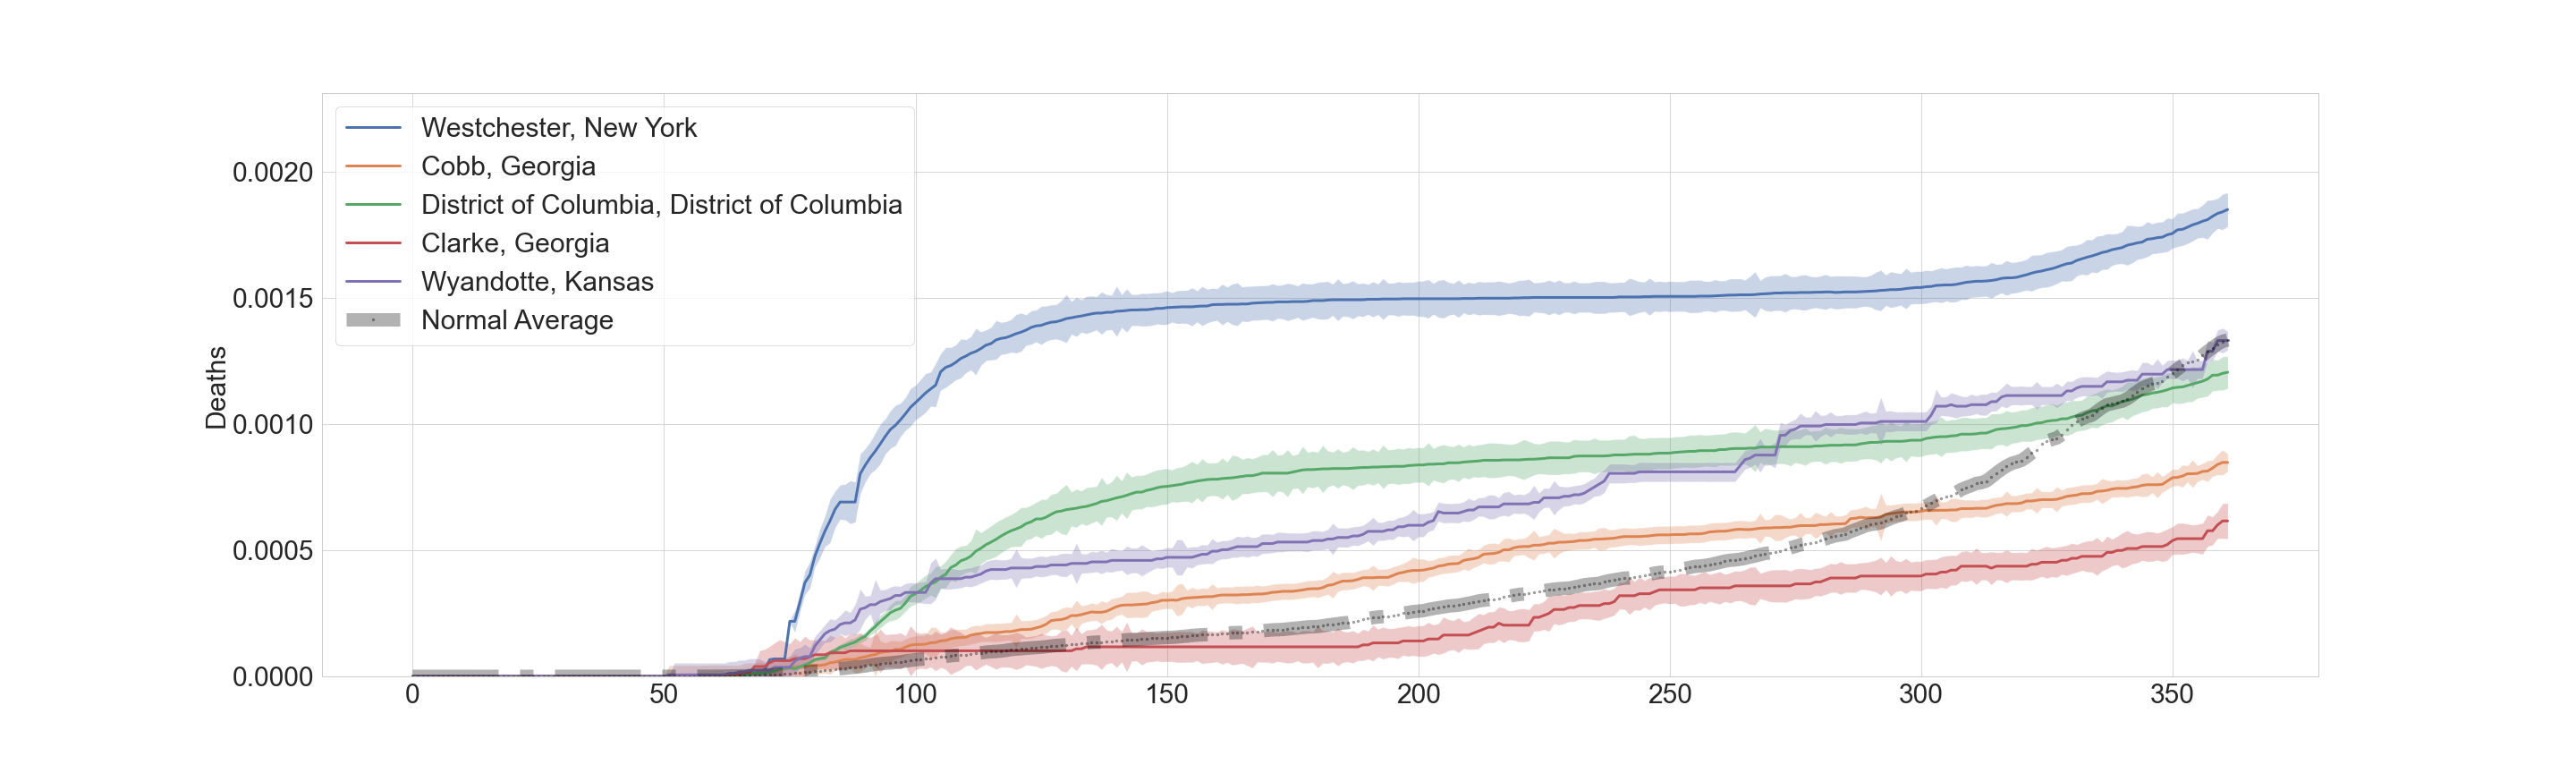

In [248]:
plot_ldp_ts(361,output,image_path_covid,'Deaths_total_full_history','Deaths',
            'Anomalous Trends in Total Deaths: Complete History',dates,data_deaths_full3,data_deaths3,
            data_deaths1)



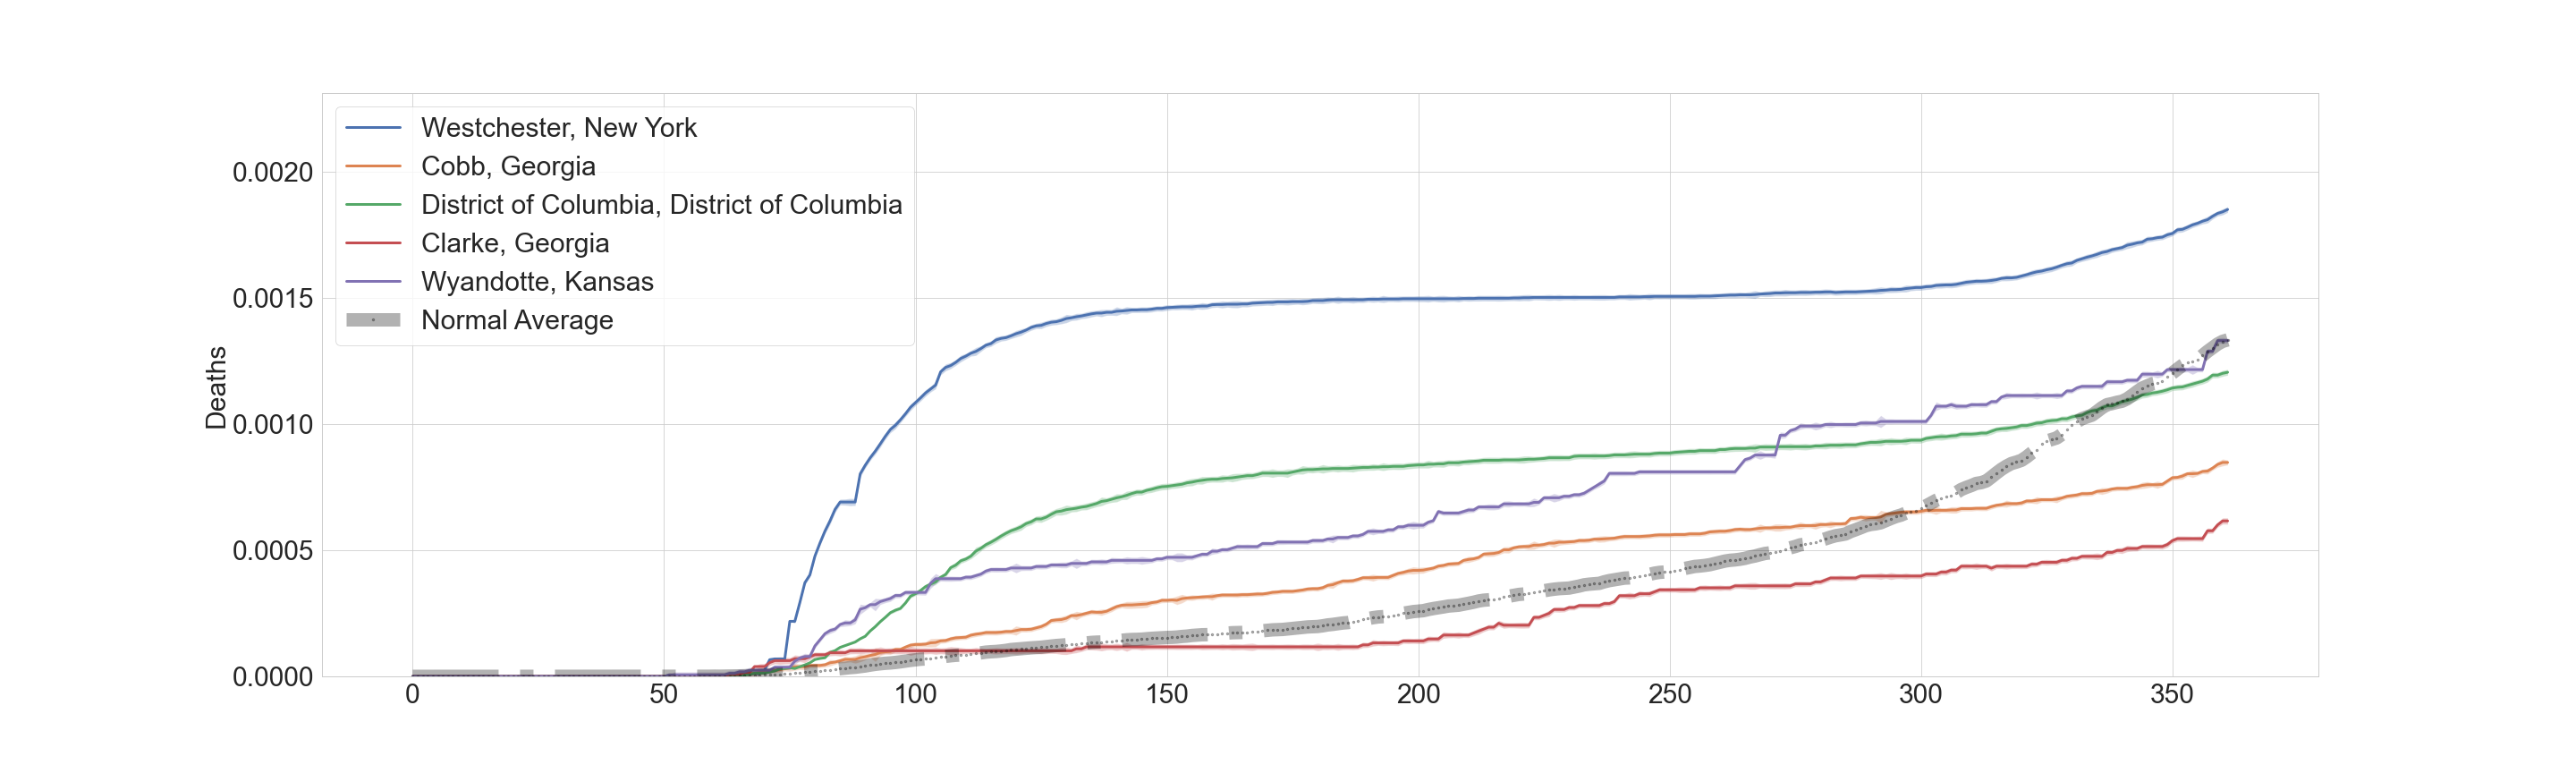

In [200]:
plot_ldp_ts(361,output,image_path_covid,'Deaths_total_full_history','Deaths',
            'Anomalous Trends in Total Deaths: Complete History',dates,data_deaths_full3,data_deaths3,
            data_deaths1)

In [110]:
N,D=X_full.shape

In [211]:
output=pickle.load(open(image_path_covid_non_unif+'Deaths_total_full_history'+".pickle", "rb" ))

In [301]:
keys=output['z'].keys()

z_array=np.zeros((N,start+len([*keys])))
start=[*keys][0]
for n in keys:
    z_array[:,n-start]=output['z'][n]

In [338]:
ana_prob_array_0=np.copy(output['ana_prob_array'])

max_prop=0
inds_shift=[]
for n in range(N):
    l,s=np.unique(z_array[n],return_counts=True)
#     print(l)
    if len(l)==3 and s[0]/(D-s[1])>0.45 and s[2]/(D-s[1])>0.4:
        max_prop=np.max([np.min(s/D),max_prop])
        inds_shift.append(n)
        
        print(n, l, s)
#         break

488 [-1.  0.  1.] [148  45 132]
1867 [-1.  0.  1.] [146  43 136]
2305 [-1.  0.  1.] [136  61 128]
2444 [-1.  0.  1.] [128  83 114]
2630 [-1.  0.  1.] [142  48 135]
2970 [-1.  0.  1.] [152  37 136]


In [349]:
data_deaths5[inds_shift]

array([[3.62607876e-05, 3.62607876e-05, 3.62607876e-05, ...,
                   nan,            nan,            nan],
       [7.11960944e-05, 7.11960944e-05, 7.11960944e-05, ...,
                   nan,            nan,            nan],
       [2.55160624e-05, 2.55160624e-05, 2.55160624e-05, ...,
                   nan,            nan,            nan],
       [7.02740689e-05, 7.02740689e-05, 7.02740689e-05, ...,
                   nan,            nan,            nan],
       [1.15113611e-06, 1.15113611e-06, 1.15113611e-06, ...,
                   nan,            nan,            nan],
       [3.68360758e-06, 0.00000000e+00, 0.00000000e+00, ...,
                   nan,            nan,            nan]])

In [340]:
prefix='Deaths_total_full_history'
image_path=image_path_covid
# ,'Deaths','Anomalous Trends in Total Deaths: Complete History'


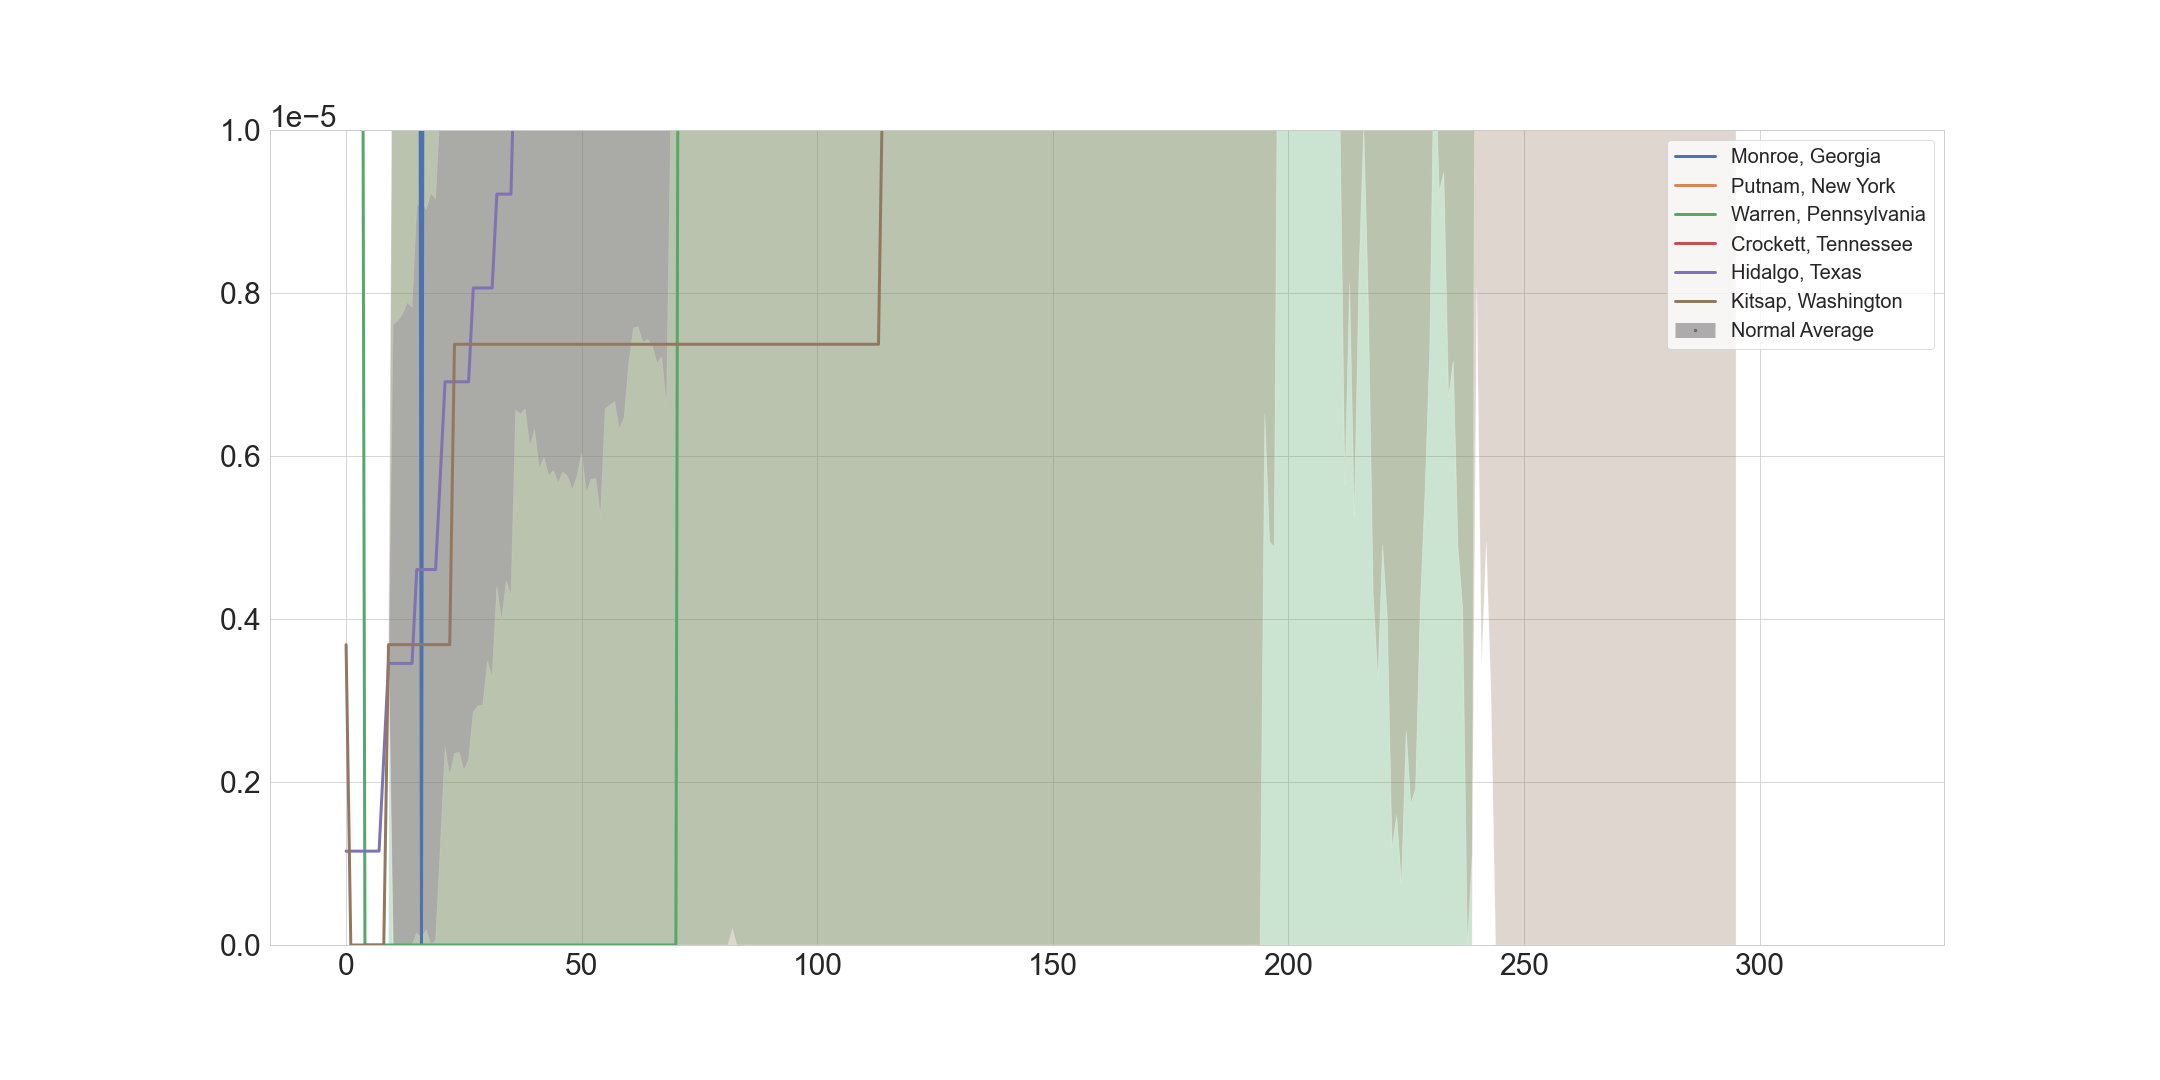

In [344]:
    z=output['z']
    ana_prob_array_0=np.copy(output['ana_prob_array'])
    ana_prob_array=np.copy(ana_prob_array_0)
#     ana_prob_array=np.copy(1-np.exp(-ana_prob_array_0))
    ana_prob_array/=np.quantile(ana_prob_array.flatten(),0.999)
    N,D=ana_prob_array_0.shape
    
    z_full=np.zeros((N,D))
    for d in z.keys():
        z_full[:,d]=z[d]

    z_full[z_full==1]=0
    z_full*=-1

    if 'history' in prefix and 'Non_uniform' in image_path:
        sorted_counties=np.argsort(-ana_prob_array_0[:,rank_point])
    else:
        sorted_counties=np.argsort(-np.nanmean(ana_prob_array_0,axis=1))



    ana_ts=sorted_counties[:10]
    normal_ts=sorted_counties[:]

    X_f=np.copy(np.array(pd.DataFrame(data_deaths5)))
    
#     inds=ana_ts
    inds=np.array(inds_shift)
#     inds=np.argsort(np.nanmean(ana_prob_array_0,axis=1))[-10:]

    fig, (ax3) = plt.subplots(1, 1,figsize=(30,15))
    
    X_f[np.isnan(X_f)]=0
    factor=np.mean(X_f[inds])/10
    inds1=inds[data_deaths1['Population'][inds]<10000]

    ymin,ymax=np.min(np.min(pd.DataFrame(data_deaths5).T[inds])), np.max(np.max(pd.DataFrame(data_deaths5).T[inds]))
    ax3.set_ylim([-ymin,ymax*1.25])    

    for i in inds:
            x,y=range(D),pd.DataFrame(data_deaths5).loc[i]
            
            lag_point=np.where(np.isnan(y))[0]
            if len(lag_point)>0:
                lag=np.where(np.isnan(y))[0][0] 
            else:
                lag=D
#             probs=np.append(np.zeros(lag),ana_prob_array[i,:-lag])
#             probs=1-np.exp(-np.copy(ana_prob_array[i,:]))
            probs=ana_prob_array[i,:]
            probs/=np.mean(probs)


            y_upper, y_lower=y+probs*factor,y-probs*factor
            y_lower[y_lower<0]=0
            label_str=data_deaths1[['Admin2']].loc[i][0]+", "+data_deaths1[['Province_State']].loc[i][0]
            if i in inds1:
                label_str=label_str+str(' (Population<10k)')
            
            ax3.plot(range(D), y, linewidth=3,label=label_str)
            ax3.fill_between(range(D), y_lower, y_upper,
                             alpha=0.3
                            )
    ax3.plot(range(D),np.nanmean(np.array(pd.DataFrame(data_deaths5))[normal_ts],axis=0),'.-.',color='black',
             linewidth=15.0,alpha=0.3,label='Normal Average')

    ax3.legend(prop={'size': 20})
#     ax3.set_ylabel(ylabel)
#     plt.savefig(image_path+prefix+'_top_10_per_capita.png')



In [197]:
inds

[504, 1223, 1427, 1449]

<AxesSubplot:>

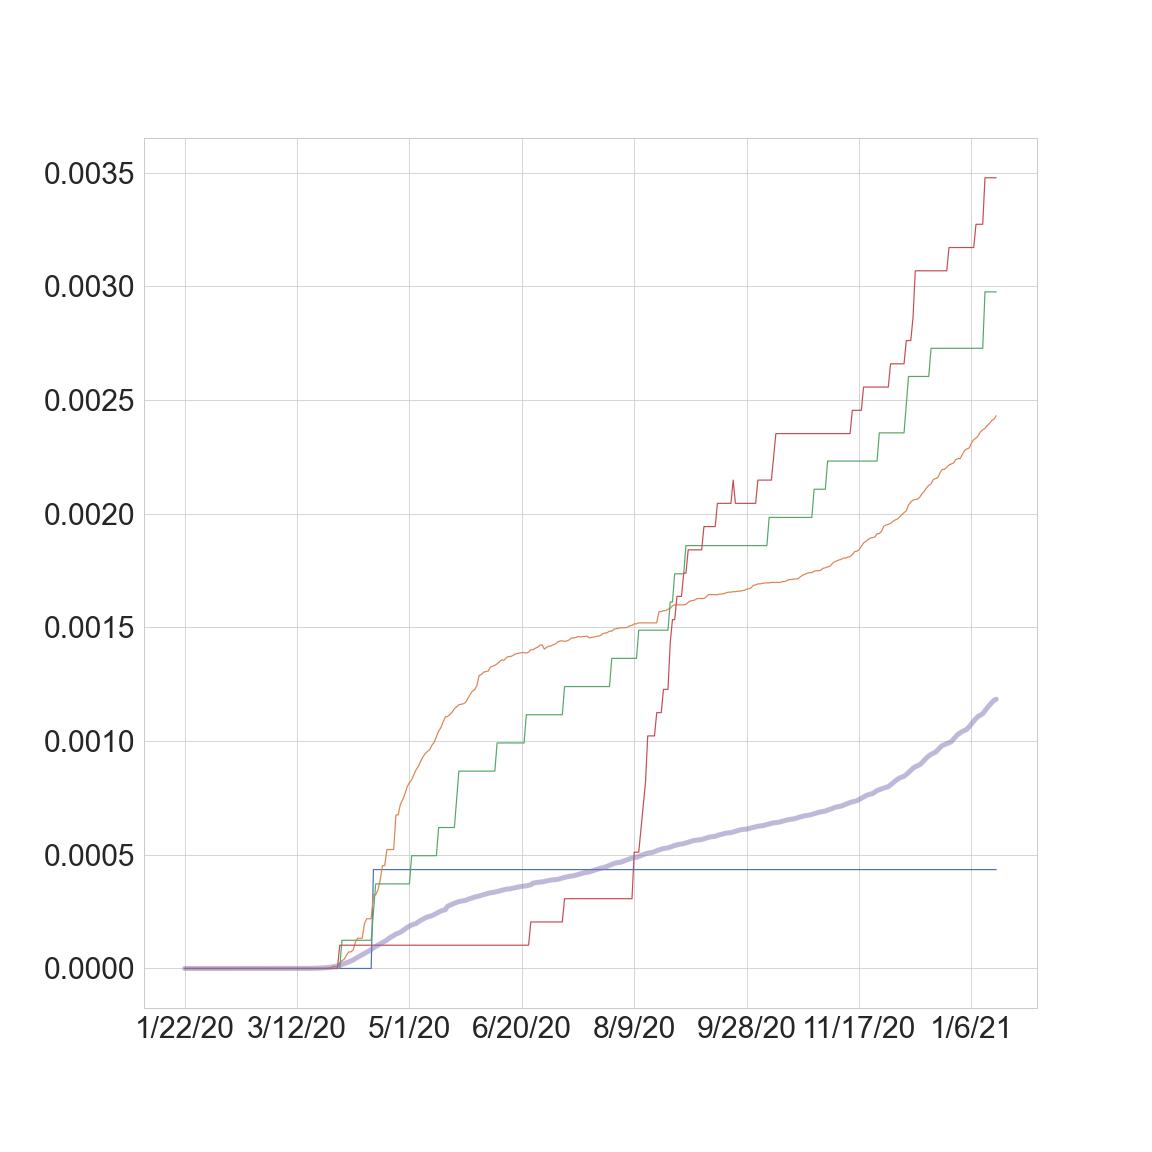

In [191]:
ax=data_deaths3.loc[inds_shift].T.plot(legend=False)
n_avg=(data_deaths2.sum()/data_deaths2.sum()['Population']).drop(['Population'])
(n_avg).plot(label='National Avg', linewidth=5, alpha=0.5)



In [19]:
def plot_ldp_ts_non_uniform(rank_point,output,image_path,prefix,ylabel,title,dates,data_deaths_full3,
                data_deaths5,data_deaths1):

    z=output['z']
    ana_prob_array_0=np.copy(output['ana_prob_array'])
    ana_prob_array=1-np.exp(-ana_prob_array_0)
    ana_prob_array/=np.max(ana_prob_array,axis=1)[:,np.newaxis]
    N,D=ana_prob_array_0.shape
    
    z_full=np.zeros((N,D))
    for d in z.keys():
        z_full[:,d]=z[d]

    z_full[z_full==1]=0
    z_full*=-1

    if 'history' in prefix and 'Non_uniform' in image_path:
#         print("fff")
        sorted_counties=np.argsort(-ana_prob_array_0[:,rank_point])
    else:
#         print("sdbfsk")
        sorted_counties=np.argsort(-np.nanmean(ana_prob_array_0,axis=1))

        
        
#     sorted_counties=np.argsort(-np.nanmean(ana_prob_array,axis=1))
#     sorted_counties=np.argsort(-np.nanmean(ana_prob_array_0,axis=1))
#     sorted_counties=np.argsort(-ana_prob_array_0[:,rank_point])
#     sorted_counties=np.argsort(-np.nanmean(z_full,axis=1))
    
#     pp=np.multiply(z_full,ana_prob_array)
#     sorted_counties=np.argsort(-np.nanmean(pp,axis=1))



    ana_ts=sorted_counties[:10]
    normal_ts=sorted_counties[100:]
    if len(normal_ts)==0:
        normal_ts=sorted_counties[10:]

    X_f=np.copy(np.array(data_deaths5))
    inds=ana_ts

    fig, (ax3) = plt.subplots(1, 1,figsize=(30,15))
    # fig.suptitle('Top 10 Anomlaous Counties',size=32)
    inds1=inds[data_deaths1['Population'][inds]<10000]
    
    X_f[np.isnan(X_f)]=0
    factor=np.mean(X_f[inds])/10

    ymin,ymax=np.min(np.min(data_deaths5.T[inds])), np.max(np.max(data_deaths5.T[inds]))
    ax3.set_ylim([ymin,ymax*1.5])


    for i in inds:
            x,y=range(D),data_deaths5.T[i]
            
#             lag_point=np.where(np.isnan(y))[0]
#             if len(lag_point)>0:
#                 lag=np.where(np.isnan(y))[0][0] 
#             else:
#                 lag=D
#             probs=np.append(np.zeros(lag),ana_prob_array[i,:-lag])
            probs=np.copy(ana_prob_array[i,:])
            probs/=np.mean(probs)


            y_upper, y_lower=y+probs*factor,y-probs*factor
            y_lower[y_lower<0]=0
            label_str=data_deaths1[['Admin2']].loc[i][0]+", "+data_deaths1[['Province_State']].loc[i][0]
            if i in inds1:
                label_str=label_str+str(' (Population<10k)')
            
            ax3.plot(range(D), y,linewidth=3, label=label_str)
            ax3.fill_between(range(D), y_lower, y_upper,
                             alpha=0.3
                            )
    ax3.plot(range(D),np.nanmean(np.array(data_deaths5)[normal_ts],axis=0),'.-.',color='black',
             linewidth=12.0,alpha=0.2,label='Normal Average')
    
    
    ax3.legend(prop={'size': 20})
    
    ax3.set_ylabel(ylabel)


    plt.savefig(image_path+prefix+'_top_10_per_capita.png')

    
#     plt.close('all')

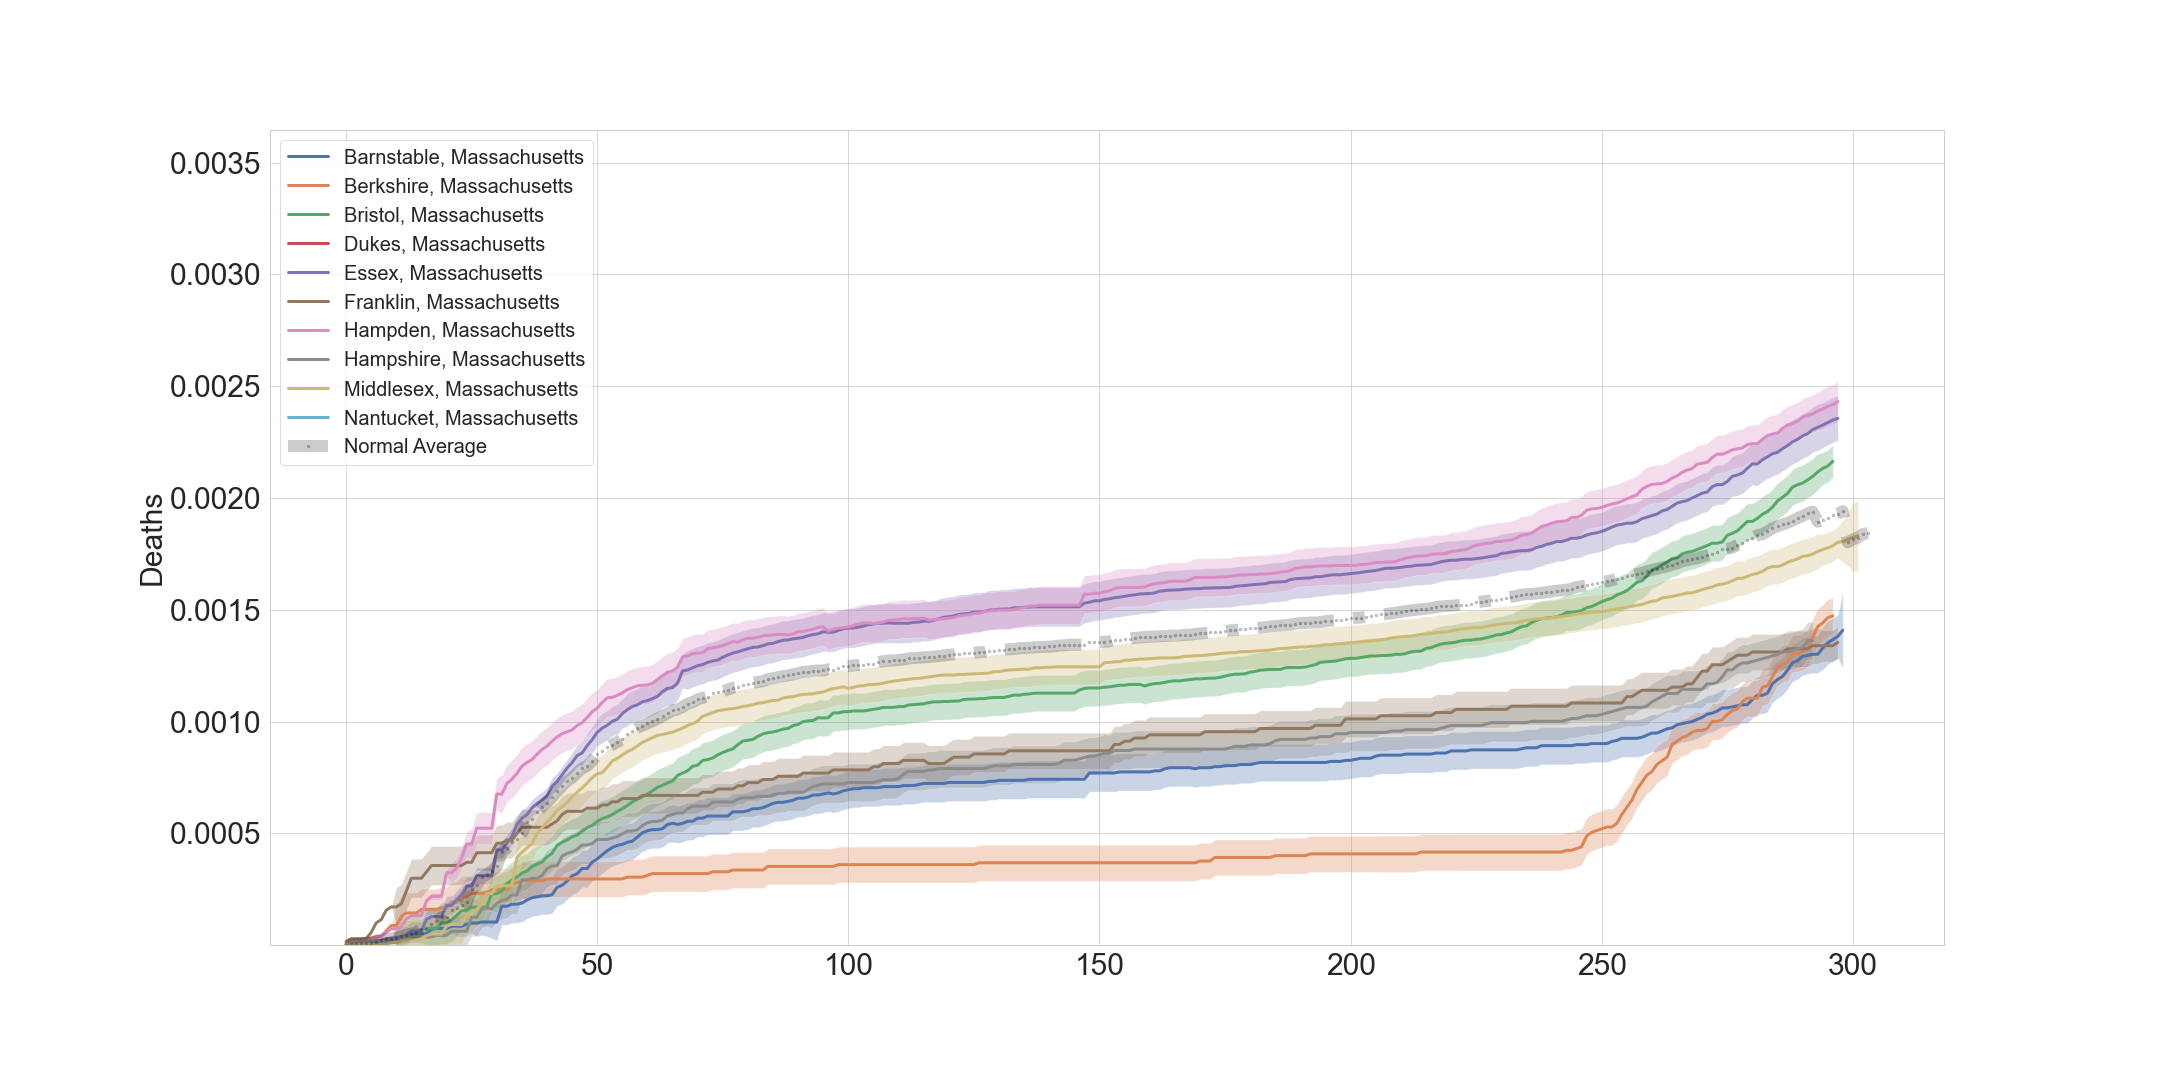

In [31]:
plot_ldp_ts_non_uniform(361,output,image_path_covid_non_unif,state+'_Deaths_total_full_history','Deaths',
                    'Anomalous Trends in Total Deaths: Complete History',dates,
                        data_deaths_full3.loc[state_inds].set_index([np.arange(0,len(state_inds))]),
                        pd.DataFrame(data_deaths5).loc[state_inds].set_index([np.arange(0,len(state_inds))]),
                                data_deaths1.loc[state_inds].set_index([np.arange(0,len(state_inds))]))

In [27]:
inds=np.arange(10)

In [30]:
(pd.DataFrame(data_deaths5).loc[state_inds]).loc[inds]

KeyError: "None of [Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')] are in the [index]"

###### Rough

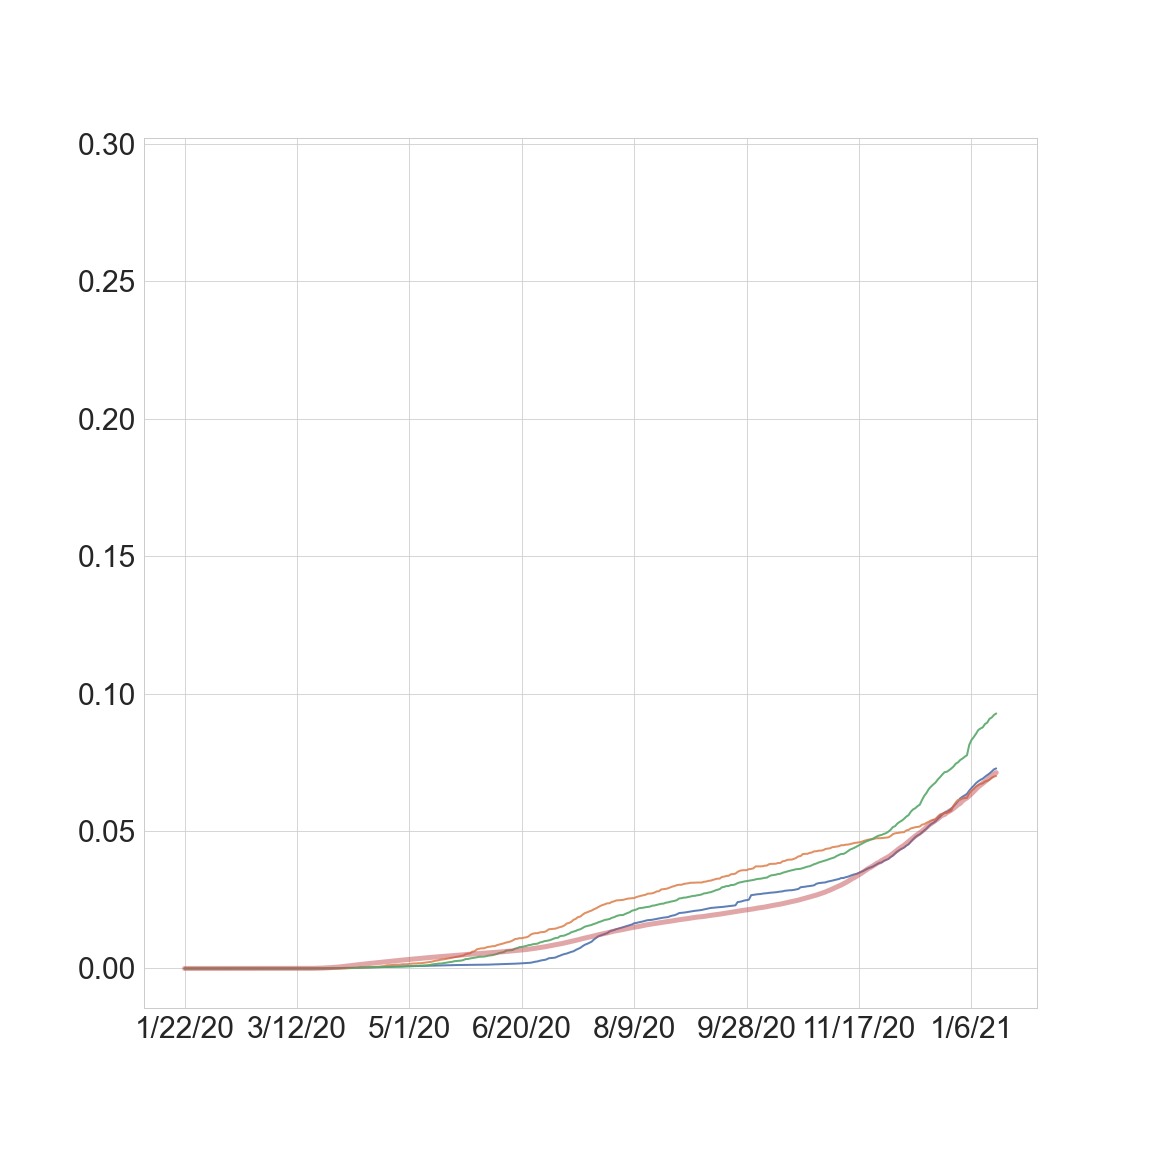

In [56]:
sorted_counties=np.argsort(-np.mean(ana_prob_array[:,-3:],axis=0))

ax = pd.DataFrame(data_confirmed3).T.plot(alpha=0.001,legend=None)
pd.DataFrame(data_confirmed3).loc[sorted_counties[:10]].T.plot(linewidth=2,alpha=0.9,legend=None,ax=ax)
n_avg=(data_confirmed2.sum()/data_confirmed2.sum()['Population']).drop(['Population'])
(n_avg).plot(label='National Avg', linewidth=5, alpha=0.5)

for i in sorted_counties[:10]:
    ma=pd.DataFrame(data_confirmed3).loc[i].T
    mstd=np.append(np.zeros(30),ana_prob_array[i,30:])
#     mstd=ana_prob_array[i,:]
    plt.fill_between(ma.index, ma, ma + mstd, alpha=0.2);

# mstd = (pd.DataFrame(data_confirmed3).std())
# plt.fill_between(mstd.index, n_avg -  mstd, n_avg + mstd, color="b", alpha=0.2);

In [28]:
ana_prob_array=output['ana_prob_array']

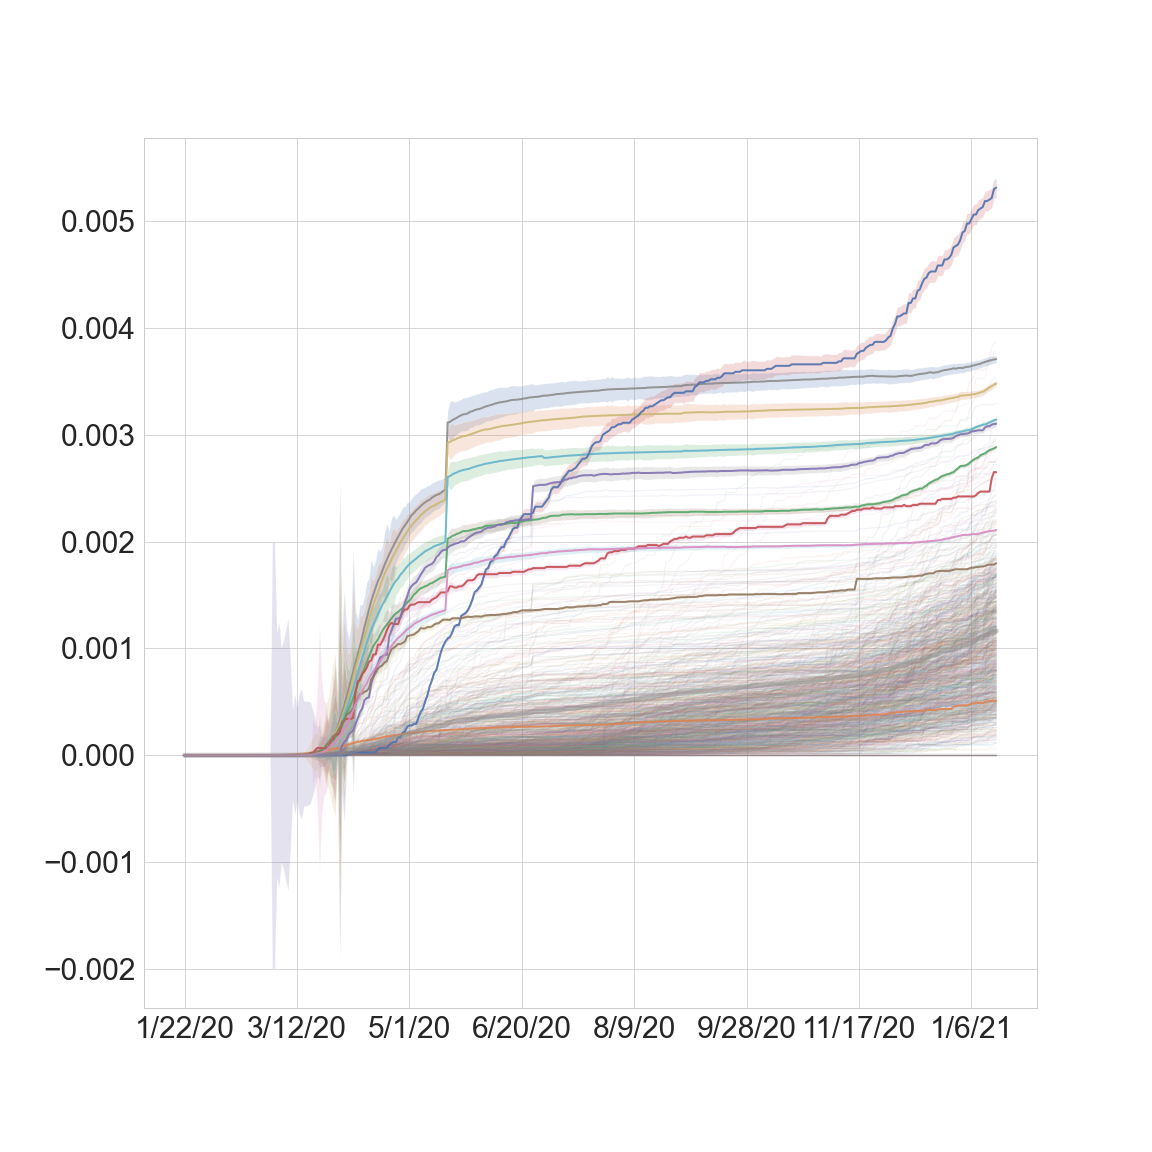

In [39]:
sorted_counties=np.argsort(-np.mean(ana_prob_array,axis=1))

ax = pd.DataFrame(data_deaths3).T.plot(alpha=0.09,legend=None)
(data_deaths3).iloc[sorted_counties[:10]].T.plot(linewidth=2,alpha=0.9,legend=None,ax=ax)
n_avg=(data_deaths2.sum()/data_deaths2.sum()['Population']).drop(['Population'])
(n_avg).plot(label='National Avg', linewidth=5, alpha=0.5)

for i in sorted_counties[:10]:
    ma=pd.DataFrame(data_deaths3).iloc[i].T
#     mstd=np.append(np.zeros(2),ana_prob_array[i,:-2])/25
    mstd=ana_prob_array[i,:]/250
    plt.fill_between(ma.index, ma - mstd, ma + mstd, alpha=0.2);

# mstd = (pd.DataFrame(data_deaths3).std())
# plt.fill_between(mstd.index, n_avg -  mstd, n_avg + mstd, color="b", alpha=0.2);

In [34]:
(data_deaths3).iloc[sorted_counties[:10]].T

,1830,1868,1851,1812,2969,1870,433,1780,1148,1858
1/22/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/23/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/24/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/25/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/26/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1/13/21,0.003686,0.003426,0.003102,0.005184,0.000504,0.002842,0.002467,0.003078,0.001781,0.002093
1/14/21,0.003693,0.003442,0.003113,0.005198,0.000508,0.002854,0.002467,0.003078,0.001784,0.002097
1/15/21,0.003697,0.003453,0.003123,0.005212,0.000511,0.002863,0.002592,0.003093,0.001784,0.002099
1/16/21,0.003703,0.003467,0.003133,0.005297,0.000511,0.002871,0.002649,0.003099,0.001784,0.002102
